In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('/Users/arijitchandra/Downloads/IOT/train.csv', parse_dates=True)
test = pd.read_csv('/Users/arijitchandra/Downloads/IOT/test.csv', parse_dates=True)
sub = pd.read_csv('/Users/arijitchandra/Downloads/IOT/sample_submission.csv')

In [2]:
print(train.shape)
print(test.shape)
print(sub.shape)

(48120, 4)
(11808, 3)
(11808, 2)


In [3]:
train.tail()

DateTime  Junction  Vehicles           ID
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

In [4]:
test.head()

DateTime  Junction           ID
0  2017-07-01 00:00:00         1  20170701001
1  2017-07-01 01:00:00         1  20170701011
2  2017-07-01 02:00:00         1  20170701021
3  2017-07-01 03:00:00         1  20170701031
4  2017-07-01 04:00:00         1  20170701041

In [5]:
train.dtypes

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object

In [6]:
%%time
from datetime import datetime
train['DateTime']=[datetime.strptime(train.DateTime[i],'%Y-%m-%d %H:%M:%S') for i in range(len(train))]
test['DateTime']=[datetime.strptime(test.DateTime[i],'%Y-%m-%d %H:%M:%S') for i in range(len(test))]

CPU times: user 2.26 s, sys: 6.88 ms, total: 2.26 s
Wall time: 2.26 s


In [7]:
train.groupby('Junction').count()

DateTime  Vehicles     ID
Junction                           
1            14592     14592  14592
2            14592     14592  14592
3            14592     14592  14592
4             4344      4344   4344

In [8]:
train.groupby('Junction')['Vehicles'].mean()

Junction
1    45.052906
2    14.253221
3    13.694010
4     7.251611
Name: Vehicles, dtype: float64

In [9]:
test.groupby('Junction').count()

DateTime    ID
Junction                
1             2952  2952
2             2952  2952
3             2952  2952
4             2952  2952

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

/Users/arijitchandra/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


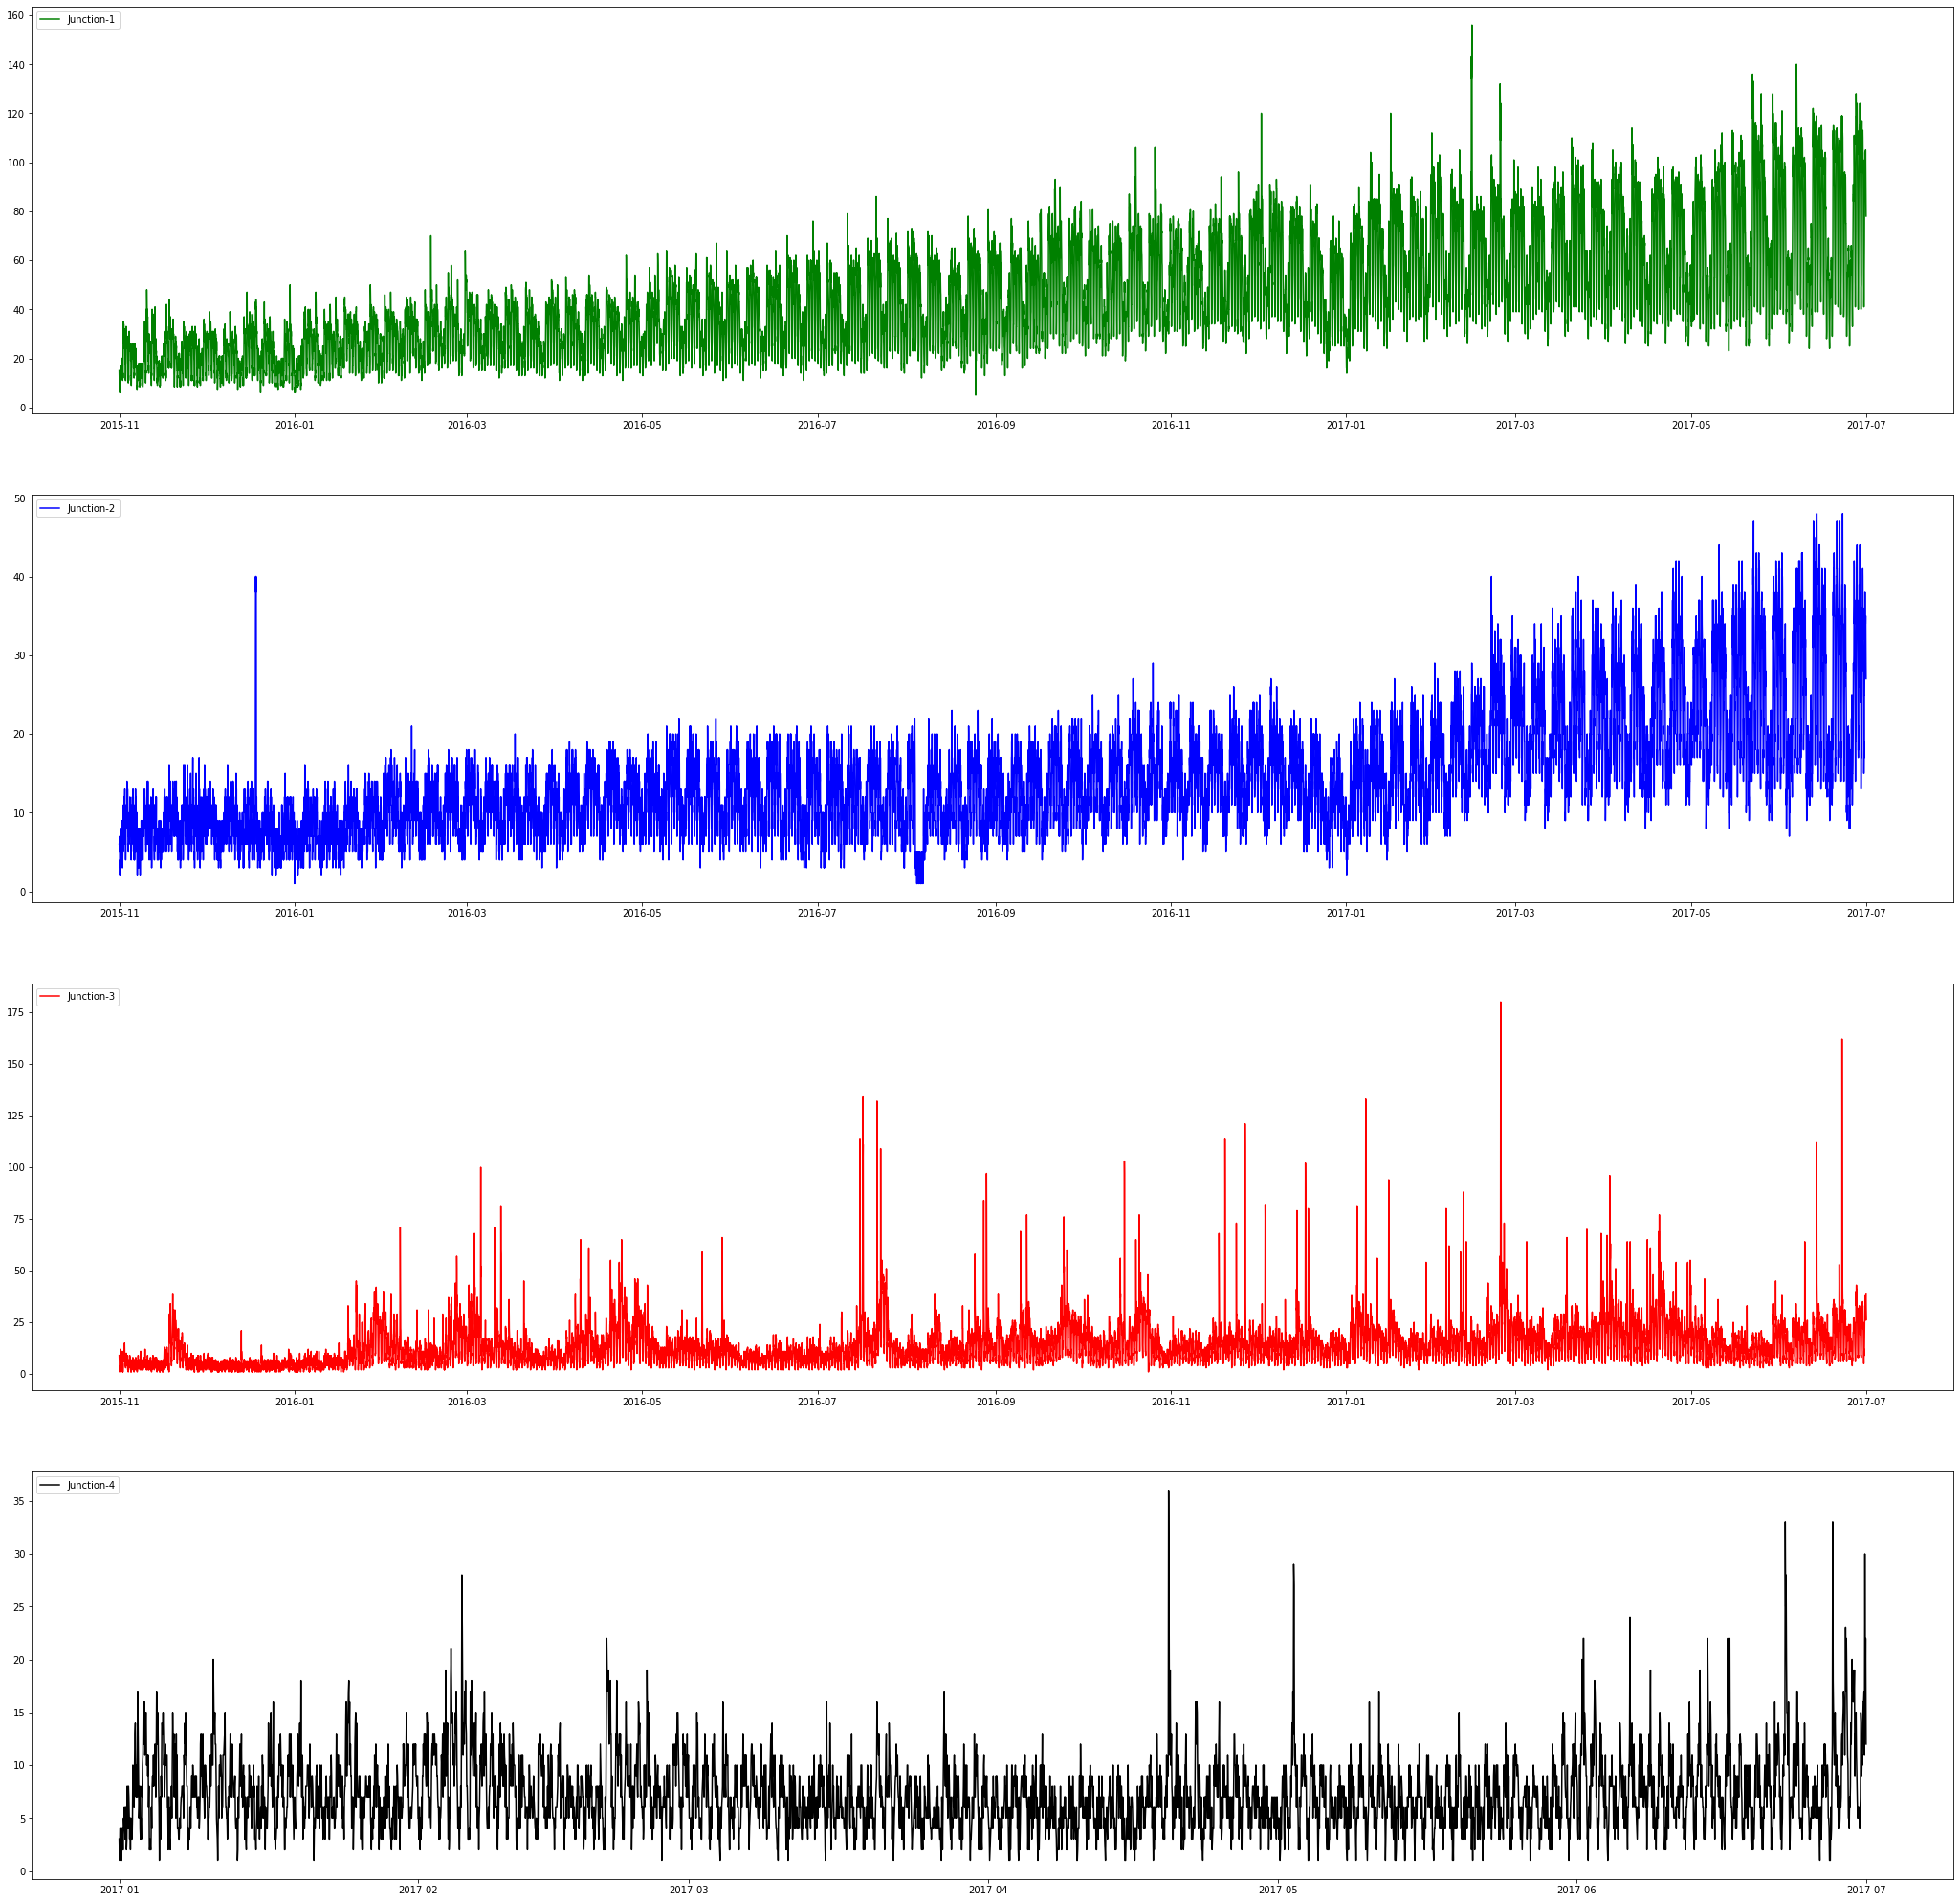

In [11]:
plt.figure(figsize=(36,36))
plt.subplot(411)
plt.plot(train[train.Junction==1].set_index('DateTime').Vehicles, color = 'green', label='Junction-1')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(train[train.Junction==2].set_index('DateTime').Vehicles, color = 'blue', label='Junction-2')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(train[train.Junction==3].set_index('DateTime').Vehicles, color = 'red', label='Junction-3')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(train[train.Junction==4].set_index('DateTime').Vehicles, color = 'black', label='Junction-4')
plt.legend(loc='upper left')
plt.show()

In [12]:
train_junc1 = train[train['Junction']==1]
train_junc2 = train[train['Junction']==2]
train_junc3 = train[train['Junction']==3]
train_junc4 = train[train['Junction']==4]


In [13]:
train_junc1.set_index('DateTime', inplace=True)
train_junc2.set_index('DateTime', inplace=True)
train_junc3.set_index('DateTime', inplace=True)
train_junc4.set_index('DateTime', inplace=True)

In [14]:
test_junc1 = test[test['Junction']==1]
test_junc2 = test[test['Junction']==2]
test_junc3 = test[test['Junction']==3]
test_junc4 = test[test['Junction']==4]

test_junc1.set_index('DateTime', inplace=True)
test_junc2.set_index('DateTime', inplace=True)
test_junc3.set_index('DateTime', inplace=True)
test_junc4.set_index('DateTime', inplace=True)


In [15]:
train_junc1.drop(['ID','Junction'], axis=1, inplace=True)
train_junc2.drop(['ID','Junction'], axis=1, inplace=True)
train_junc3.drop(['ID','Junction'], axis=1, inplace=True)
train_junc4.drop(['ID','Junction'], axis=1, inplace=True)

test_junc1.drop(['ID','Junction'], axis=1, inplace=True)
test_junc2.drop(['ID','Junction'], axis=1, inplace=True)
test_junc3.drop(['ID','Junction'], axis=1, inplace=True)
test_junc4.drop(['ID','Junction'], axis=1, inplace=True)

train_junc1.shape,train_junc2.shape,train_junc3.shape,train_junc4.shape,test_junc1.shape,test_junc2.shape,test_junc3.shape,test_junc4.shape

/Users/arijitchandra/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((14592, 1),
 (14592, 1),
 (14592, 1),
 (4344, 1),
 (2952, 0),
 (2952, 0),
 (2952, 0),
 (2952, 0))

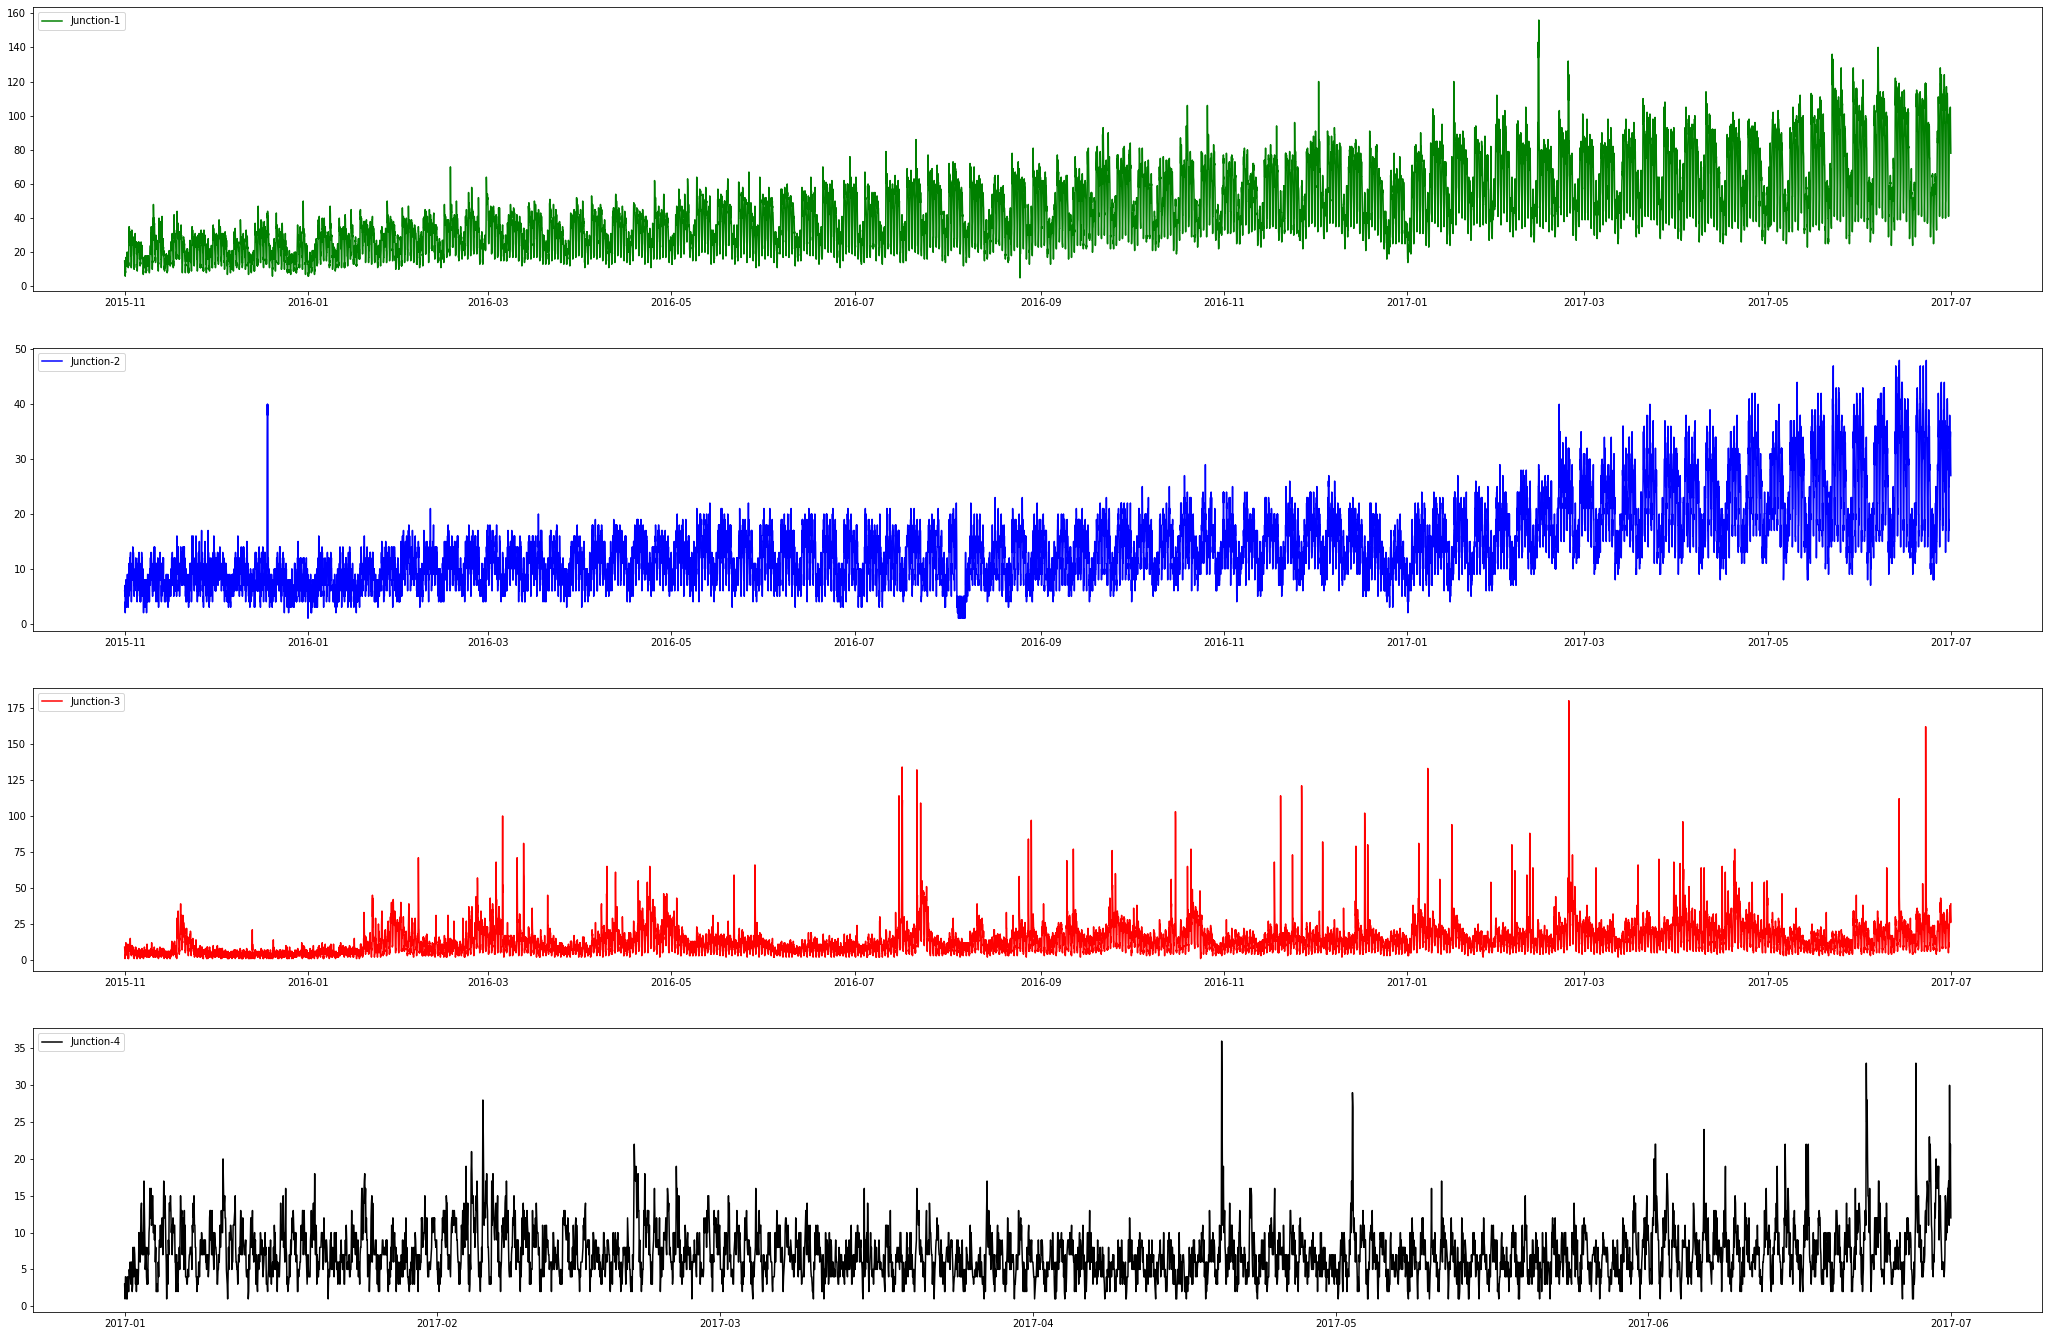

In [16]:
plt.figure(figsize=(36,24))
plt.subplot(411)
plt.plot(train_junc1, color = 'green', label='Junction-1')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(train_junc2, color = 'blue', label='Junction-2')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(train_junc3, color = 'red', label='Junction-3')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(train_junc4, color = 'black', label='Junction-4')
plt.legend(loc='upper left')
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()

    #Plot rolling statistics:
    plt.figure(figsize=(24,12))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries["Vehicles"], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

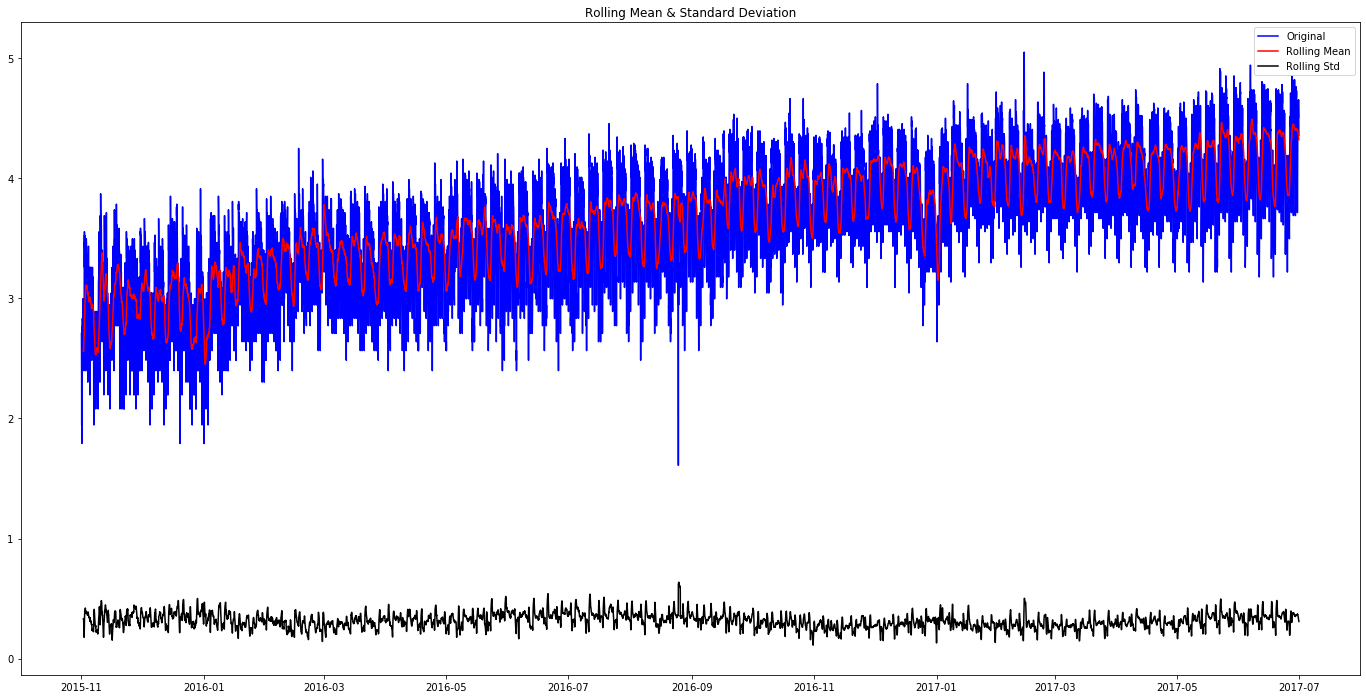

Results of Dickey-Fuller Test:
Test Statistic                -6.305408e+00
p-value                        3.332993e-08
#Lags Used                     4.200000e+01
Number of Observations Used    1.454900e+04
Critical Value (1%)           -3.430800e+00
Critical Value (5%)           -2.861739e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


In [18]:
test_stationarity(train_junc1.apply(np.log))

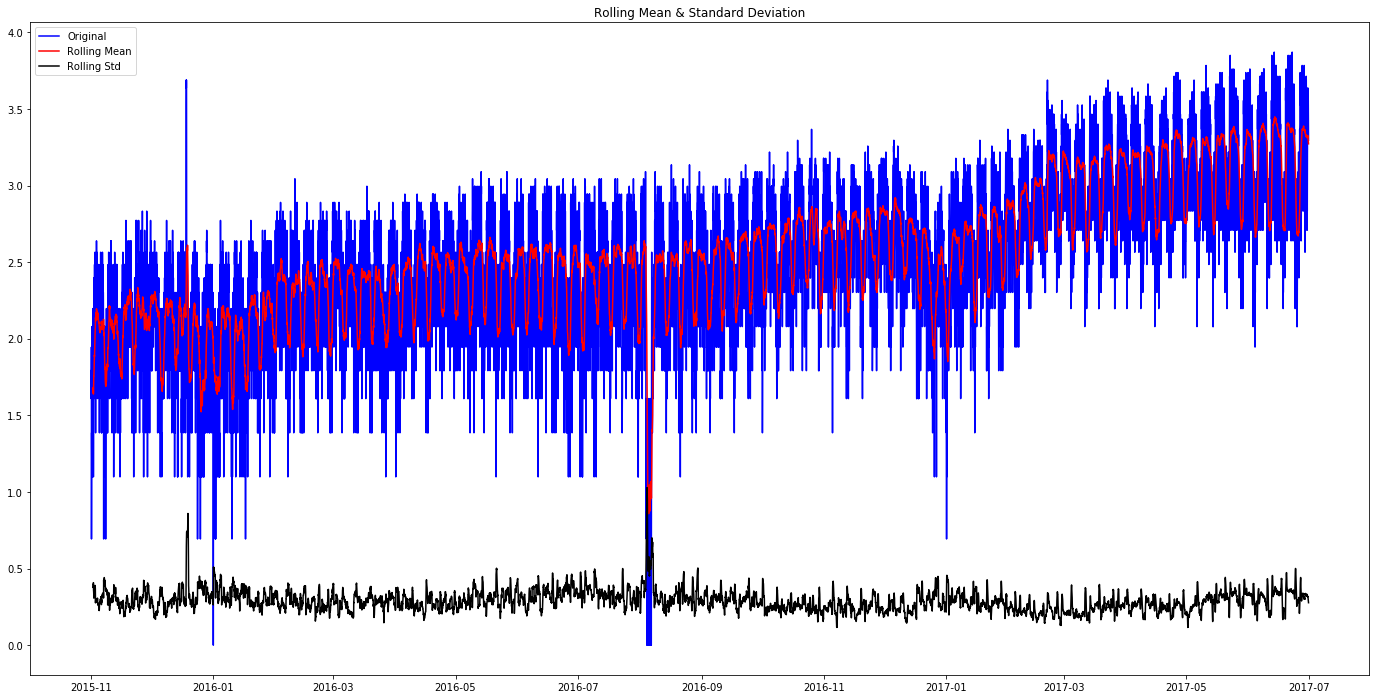

Results of Dickey-Fuller Test:
Test Statistic                -8.459969e+00
p-value                        1.576998e-13
#Lags Used                     4.200000e+01
Number of Observations Used    1.454900e+04
Critical Value (1%)           -3.430800e+00
Critical Value (5%)           -2.861739e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


In [19]:
test_stationarity(train_junc2.apply(np.log))

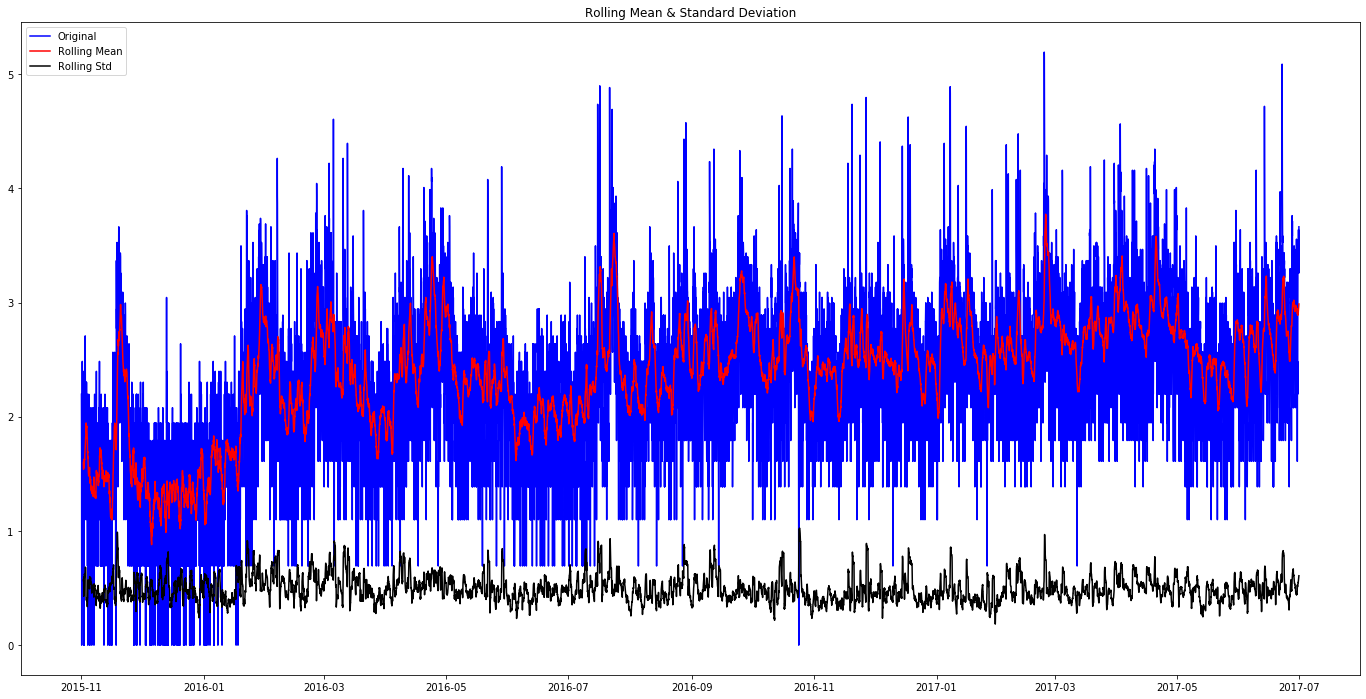

Results of Dickey-Fuller Test:
Test Statistic                -5.740527e+00
p-value                        6.291014e-07
#Lags Used                     4.200000e+01
Number of Observations Used    1.454900e+04
Critical Value (1%)           -3.430800e+00
Critical Value (5%)           -2.861739e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


In [20]:
test_stationarity(train_junc3.apply(np.log))

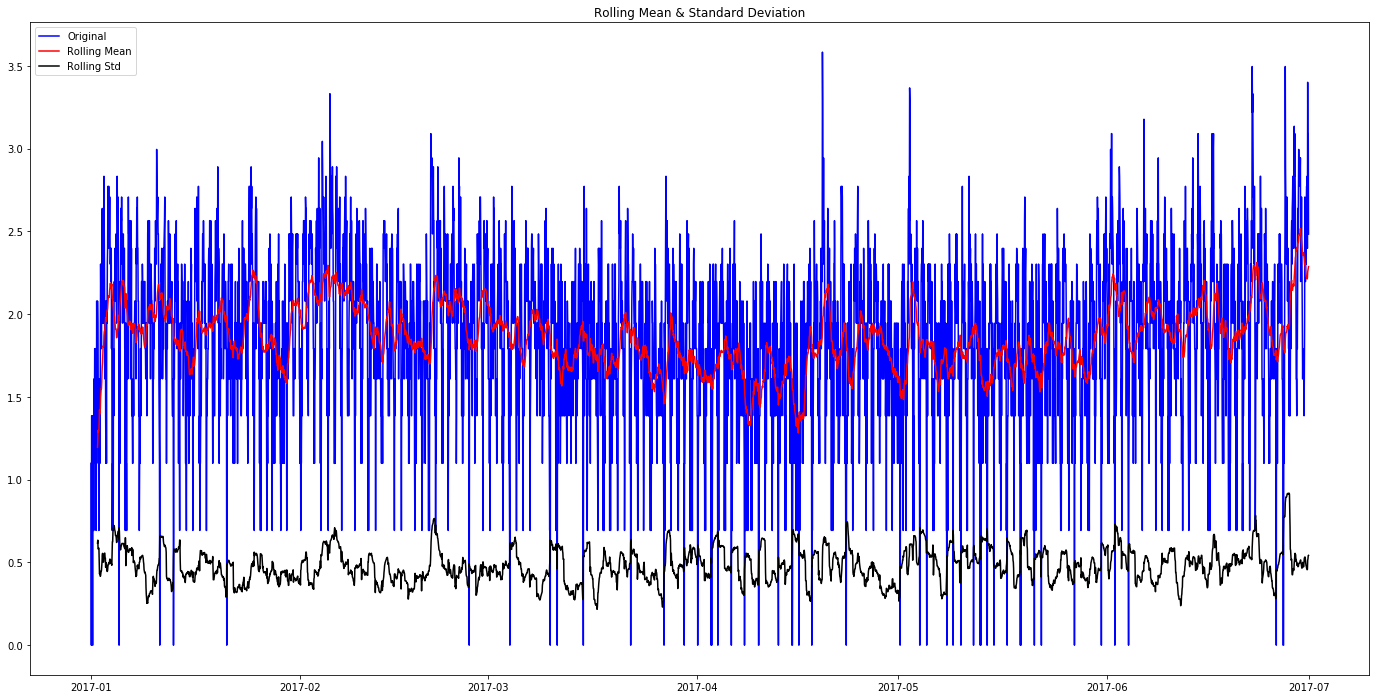

Results of Dickey-Fuller Test:
Test Statistic                -7.190868e+00
p-value                        2.505757e-10
#Lags Used                     3.100000e+01
Number of Observations Used    4.312000e+03
Critical Value (1%)           -3.431867e+00
Critical Value (5%)           -2.862211e+00
Critical Value (10%)          -2.567127e+00
dtype: float64


In [21]:
test_stationarity(train_junc4.apply(np.log))

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_j1 = seasonal_decompose(train_junc1.apply(np.log))
trend_j1 = decomposition_j1.trend
seasonal_j1 = decomposition_j1.seasonal
residual_j1 = decomposition_j1.resid

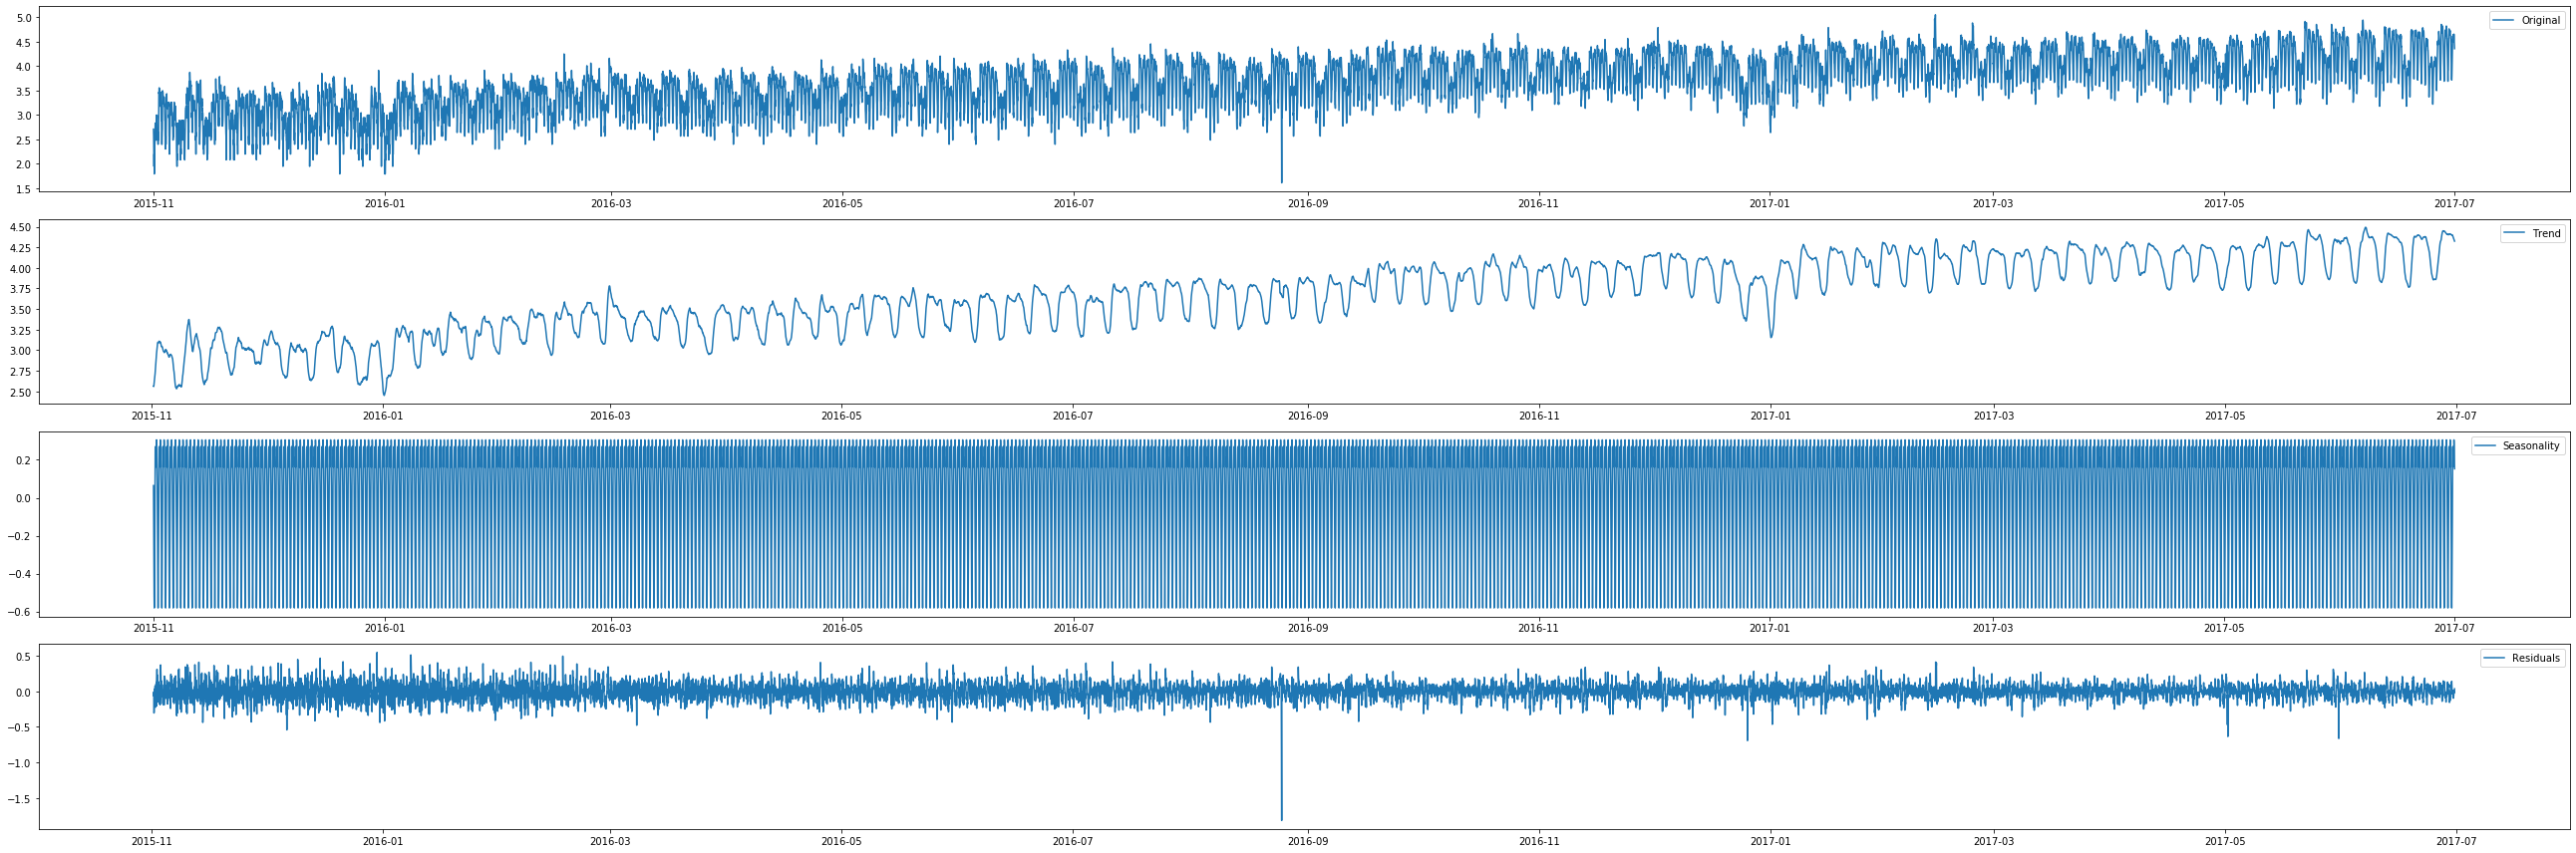

In [23]:
plt.figure(figsize=(36,12))
plt.subplot(411)
plt.plot(train_junc1.apply(np.log), label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_j1, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_j1,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_j1, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_j2 = seasonal_decompose(train_junc2.apply(np.log))
trend_j2 = decomposition_j2.trend
seasonal_j2 = decomposition_j2.seasonal
residual_j2 = decomposition_j2.resid

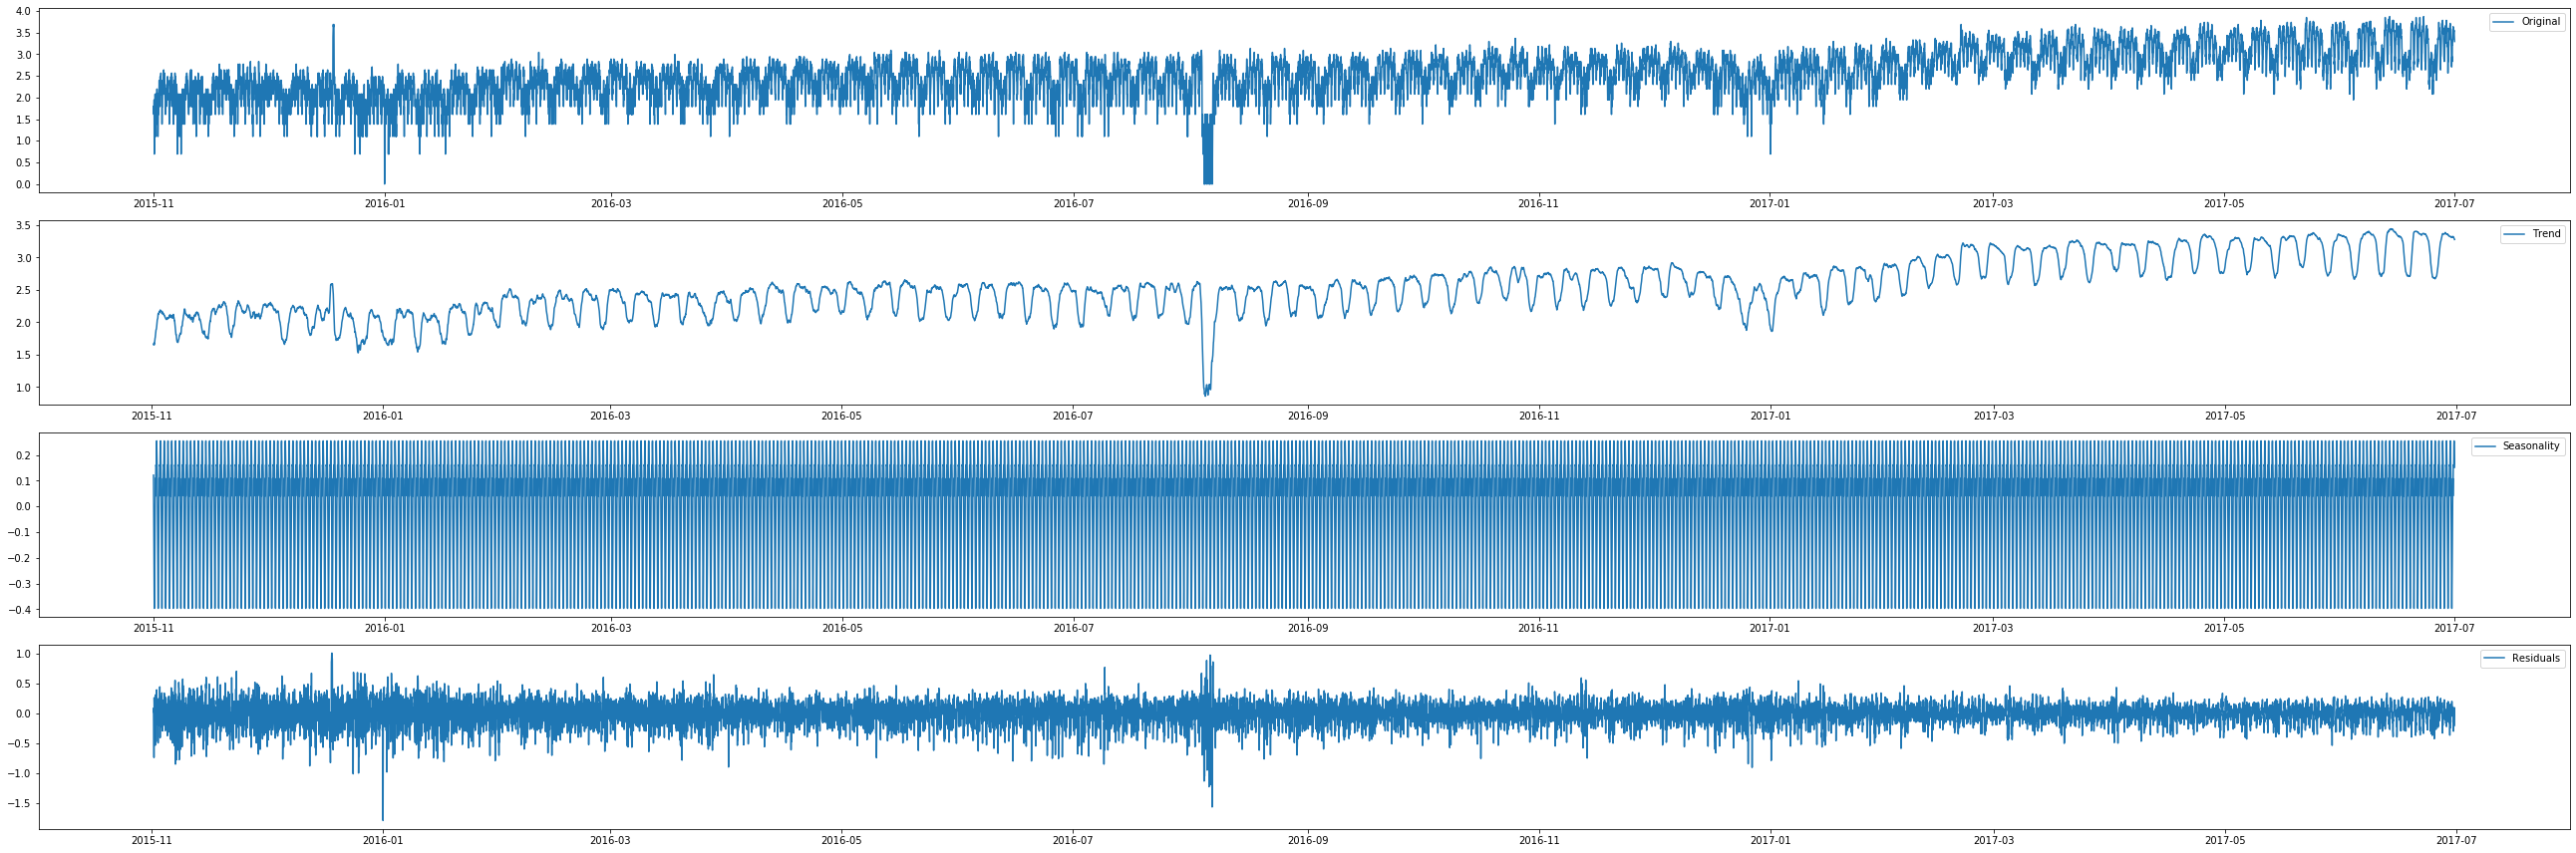

In [25]:
plt.figure(figsize=(36,12))
plt.subplot(411)
plt.plot(train_junc2.apply(np.log), label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_j2, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_j2,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_j2, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_j3 = seasonal_decompose(train_junc3.apply(np.log))
trend_j3 = decomposition_j3.trend
seasonal_j3 = decomposition_j3.seasonal
residual_j3 = decomposition_j3.resid

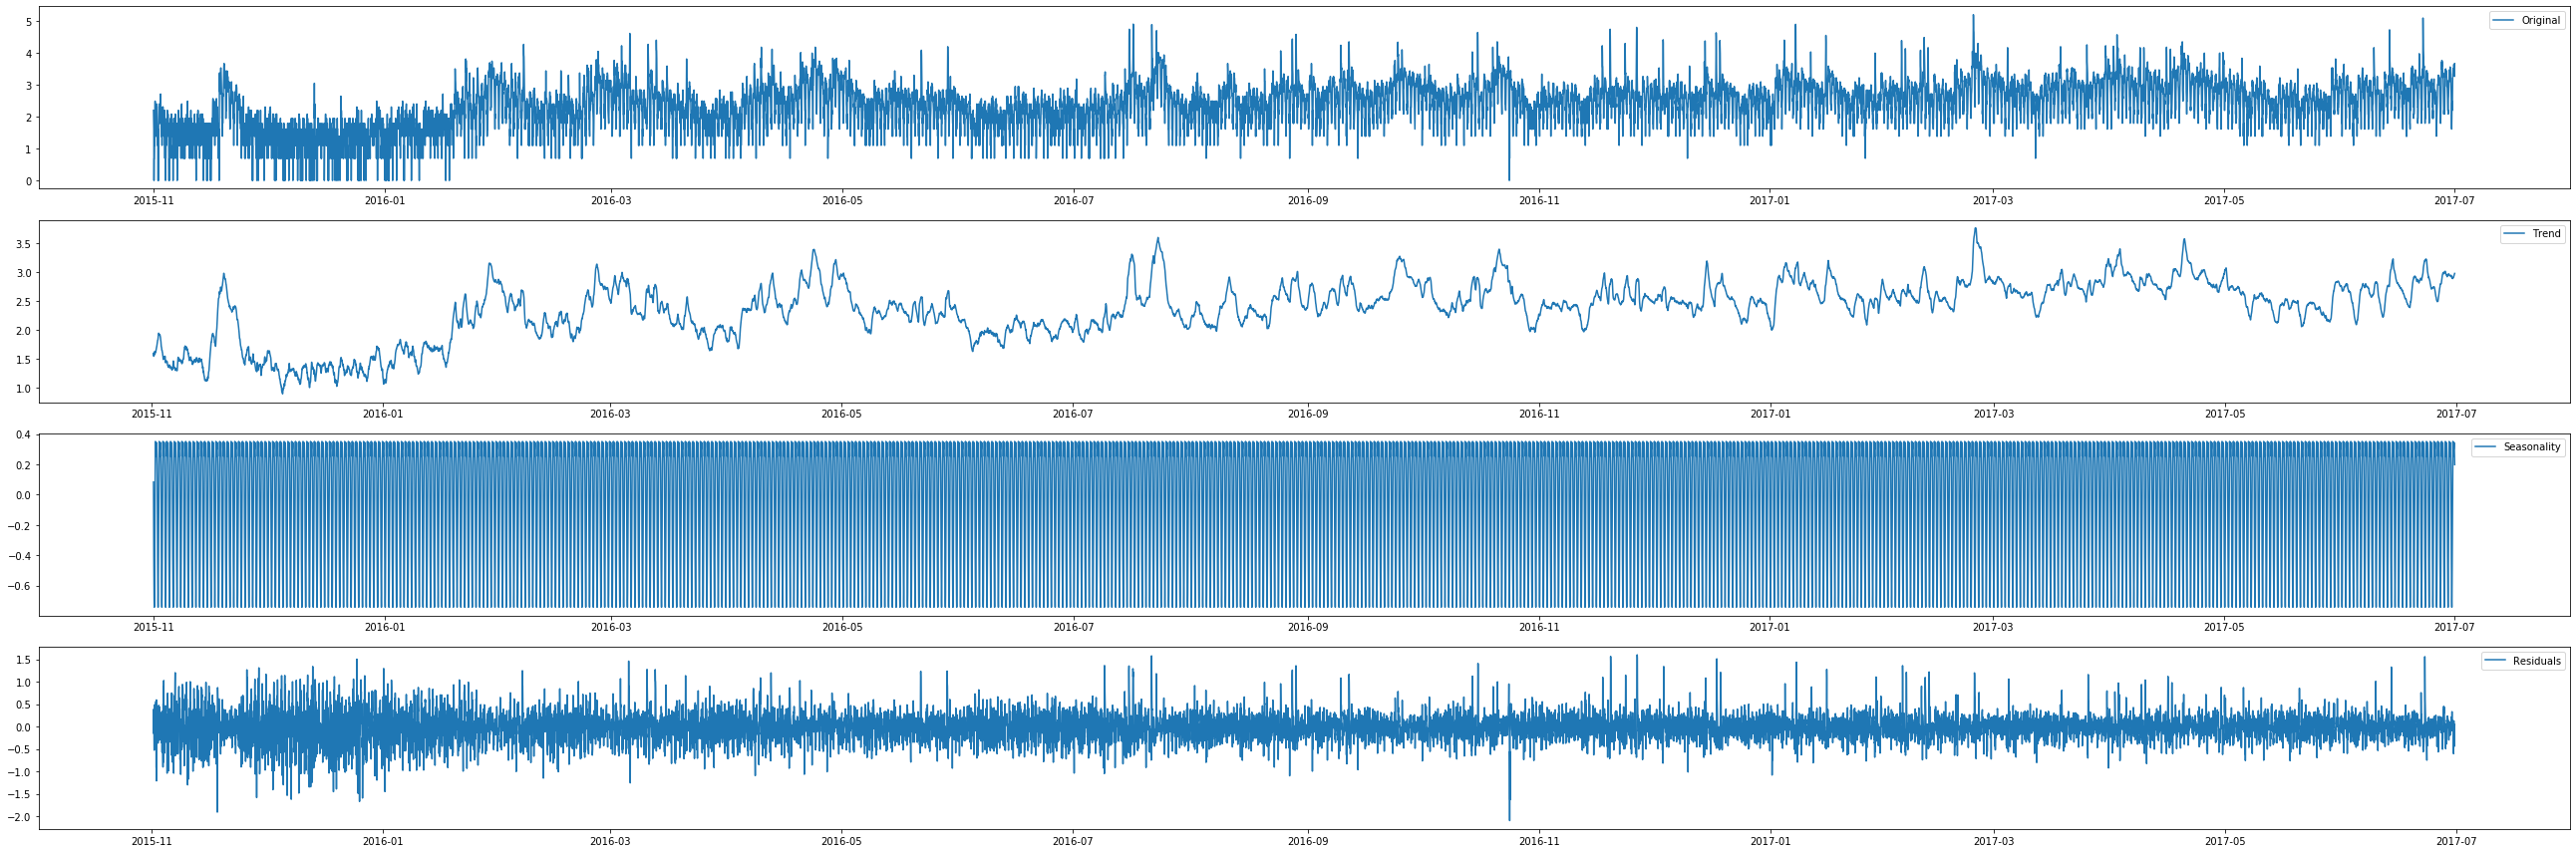

In [27]:
plt.figure(figsize=(36,12))
plt.subplot(411)
plt.plot(train_junc3.apply(np.log), label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_j3, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_j3,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_j3, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_j4 = seasonal_decompose(train_junc4.apply(np.log))
trend_j4 = decomposition_j4.trend
seasonal_j4 = decomposition_j4.seasonal
residual_j4 = decomposition_j4.resid

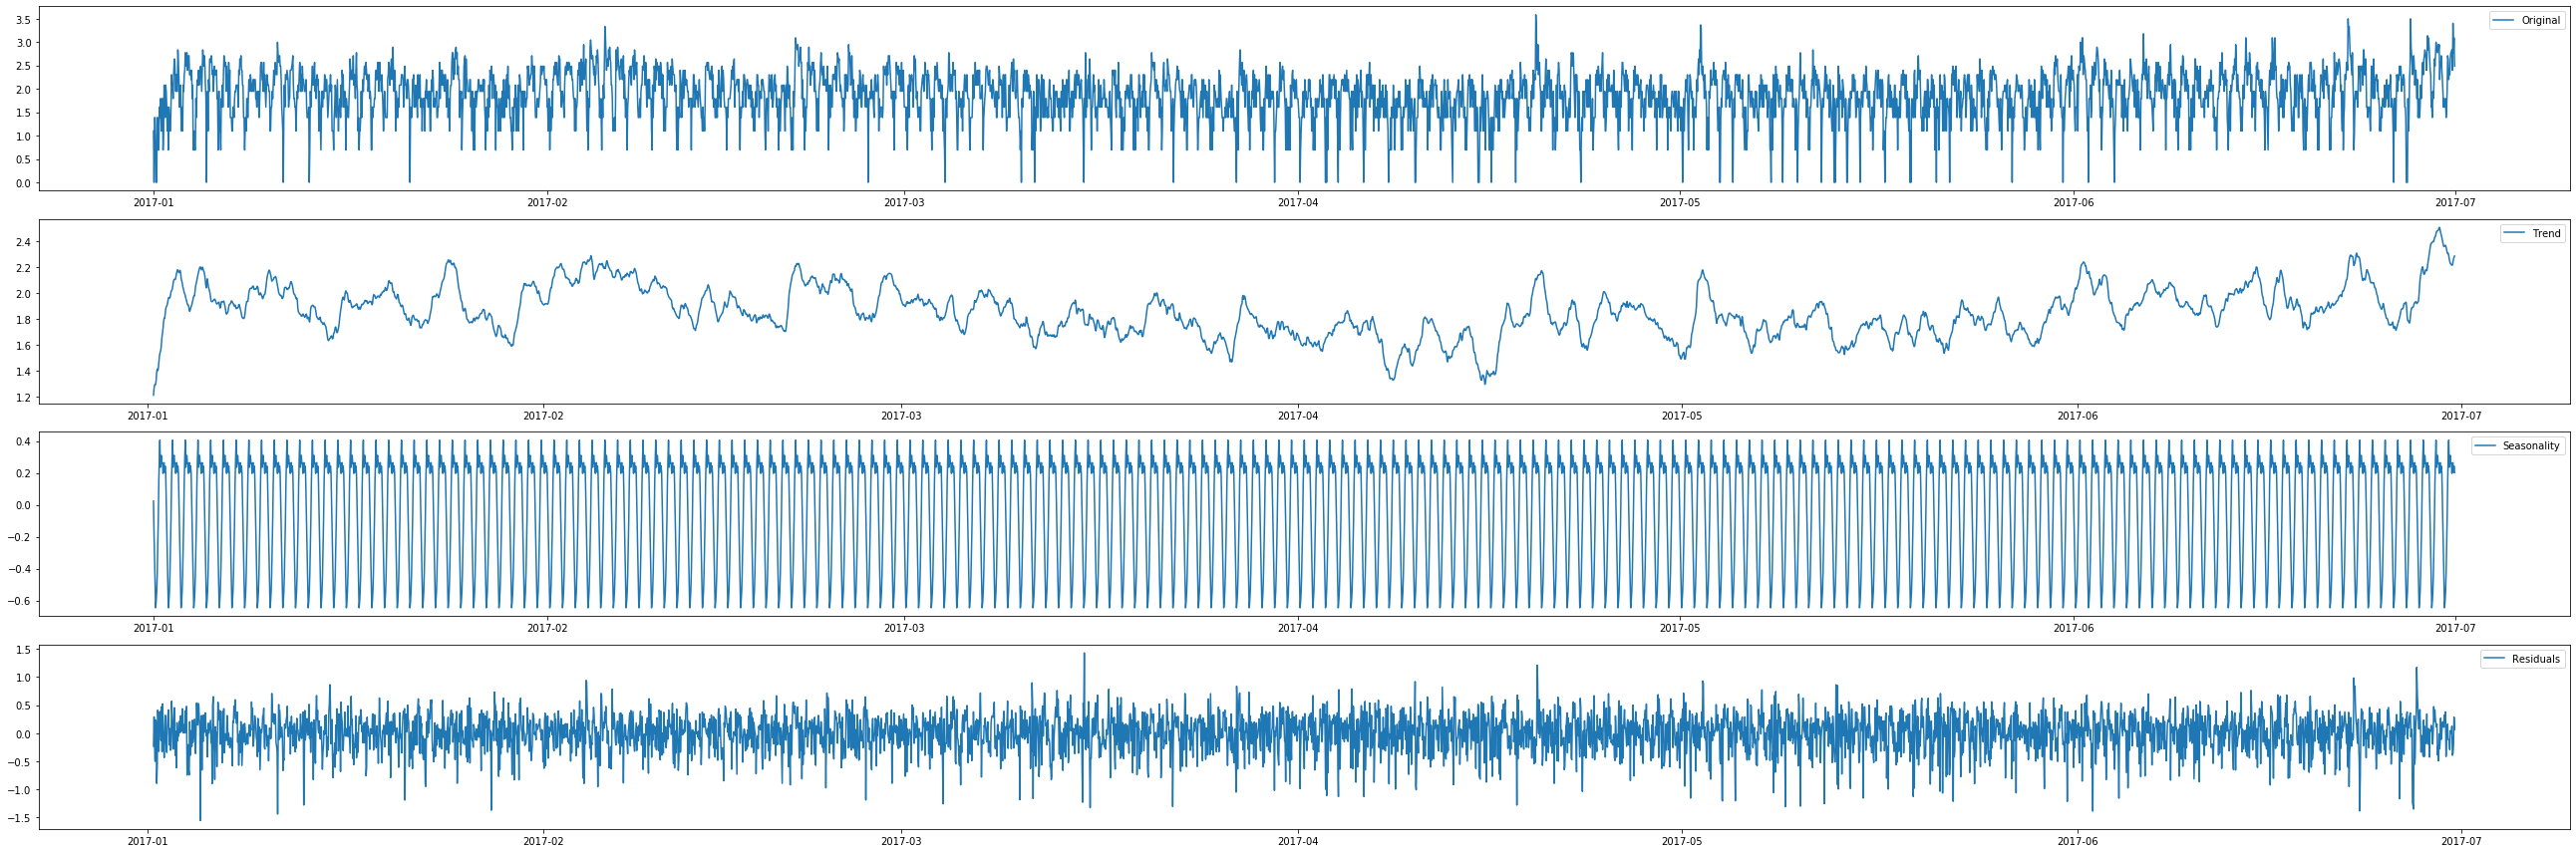

In [29]:
plt.figure(figsize=(36,12))
plt.subplot(411)
plt.plot(train_junc4.apply(np.log), label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_j4, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_j4,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_j4, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [30]:
import sklearn
import math
from sklearn.metrics import mean_squared_error
def RMSE(actual, pred):
    mse = sklearn.metrics.mean_squared_error(actual, pred)
    return math.sqrt(mse)
    

In [ ]:
#import warnings
#import itertools
#warnings.filterwarnings("ignore")
## Define the p, d and q parameters to take any value between 0 and 2
#p = d = q = range(0, 2)
#
## Generate all different combinations of p, q and q triplets
#pdq = list(itertools.product(p, d, q))
#
## Generate all different combinations of seasonal p, q and q triplets
#seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]
#
#print('Examples of parameter combinations for Seasonal ARIMA...')
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
#import statsmodels.api as sm
#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod_j1 = sm.tsa.statespace.SARIMAX(train_junc1,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)
#
#            results_j1 = mod_j1.fit()
#
#            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_j1.aic))
#        except:
#            continue

/Users/arijitchandra/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3466      0.004    -84.410      0.000      -0.355      -0.339
ma.L1         -1.0000      0.117     -8.576      0.000      -1.229      -0.771
ar.S.L24       0.0111      0.007      1.607      0.108      -0.002       0.025
ma.S.L24      -0.9639      0.002   -446.272      0.000      -0.968      -0.960
sigma2         0.0101      0.001      8.545      0.000       0.008       0.012


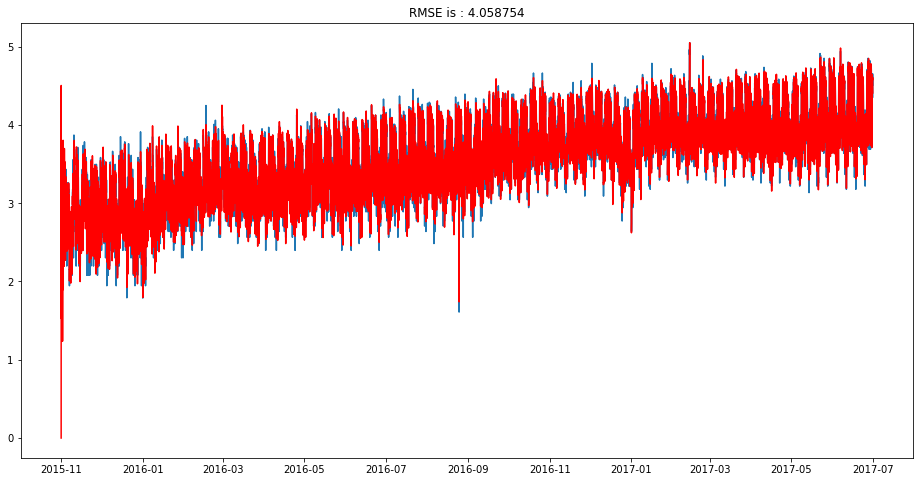

In [39]:
import statsmodels.api as sm
mod_j1 =sm.tsa.statespace.SARIMAX(train_junc1.apply(np.log),
                                order=(1, 2, 1),
                                seasonal_order=(1, 1, 1,24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_j1 = mod_j1.fit(disp=-1)

print(results_j1.summary().tables[1])
plt.figure(figsize=(16,8))
plt.plot(train_junc1.apply(np.log))
plt.plot(results_j1.fittedvalues, color='red')
plt.title('RMSE is : %4f'%RMSE(train_junc1.values,results_j1.fittedvalues.apply(np.exp)))
#results_j1.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
#import statsmodels.api as sm
#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod_j2 = sm.tsa.statespace.SARIMAX(train_junc2,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)
#
#            results_j2 = mod_j2.fit()
#
#            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_j2.aic))
#        except:
#            continue

/Users/arijitchandra/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4661      0.006    -83.353      0.000      -0.477      -0.455
ma.L1         -1.0000      0.182     -5.483      0.000      -1.357      -0.643
ar.S.L24      -0.0008      0.000     -4.227      0.000      -0.001      -0.000
ma.S.L24      -0.9792      0.002   -535.524      0.000      -0.983      -0.976
sigma2         0.0491      0.009      5.470      0.000       0.031       0.067


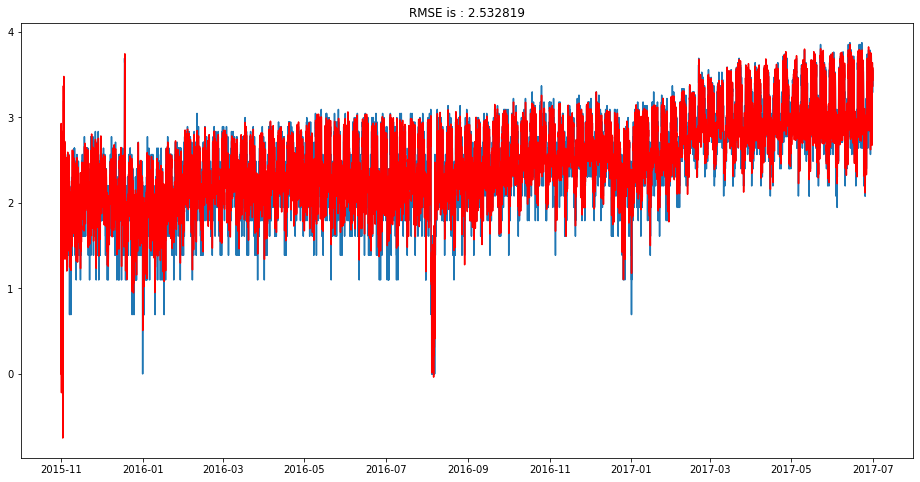

In [41]:
import statsmodels.api as sm
mod_j2 =sm.tsa.statespace.SARIMAX(train_junc2.apply(np.log),
                                order=(1, 2, 1),
                                seasonal_order=(1, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_j2 = mod_j2.fit(disp=-1)

print(results_j2.summary().tables[1])
plt.figure(figsize=(16,8))
plt.plot(train_junc2.apply(np.log))
plt.plot(results_j2.fittedvalues, color='red')
plt.title('RMSE is : %4f'%RMSE(train_junc2.values,results_j2.fittedvalues.apply(np.exp)))
#results_j2.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
#import statsmodels.api as sm
#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod_j3 = sm.tsa.statespace.SARIMAX(train_junc3,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)
#
#            results_j3 = mod_j3.fit()
#
#            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_j3.aic))
#        except:
#            continue

/Users/arijitchandra/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2609      0.008     32.462      0.000       0.245       0.277
ma.L1         -0.8632      0.005   -167.516      0.000      -0.873      -0.853
ar.S.L24       0.0290      0.007      4.234      0.000       0.016       0.042
ma.S.L24      -0.9714      0.002   -467.781      0.000      -0.975      -0.967
sigma2         0.0968      0.001    132.329      0.000       0.095       0.098


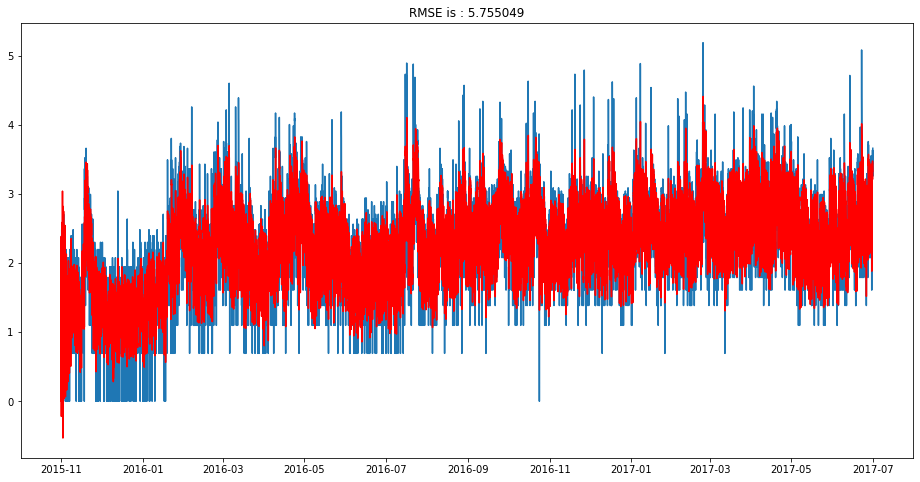

In [80]:
import statsmodels.api as sm
mod_j3 =sm.tsa.statespace.SARIMAX(train_junc3.apply(np.log),
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_j3 = mod_j3.fit()

print(results_j3.summary().tables[1])
plt.figure(figsize=(16,8))
plt.plot(train_junc3.apply(np.log))
plt.plot(results_j3.fittedvalues, color='red')
plt.title('RMSE is : %4f'%RMSE(train_junc3.values,results_j3.fittedvalues.apply(np.exp)))
#results_j3.plot_diagnostics(figsize=(15, 12))
plt.show()

/Users/arijitchandra/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4662      0.012    -39.304      0.000      -0.489      -0.443
ma.L1         -1.0000      4.235     -0.236      0.813      -9.301       7.301
ar.S.L24       0.0008      0.000      2.686      0.007       0.000       0.001
ma.S.L24      -0.9877      0.004   -244.169      0.000      -0.996      -0.980
sigma2         0.1713      0.725      0.236      0.813      -1.250       1.593


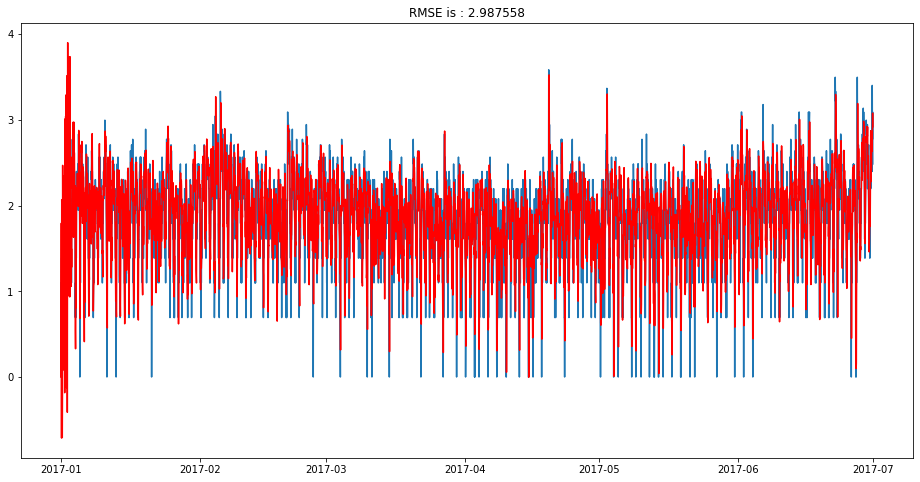

In [43]:
import statsmodels.api as sm
mod_j4 =sm.tsa.statespace.SARIMAX(train_junc4.apply(np.log),
                                order=(1, 2, 1),
                                seasonal_order=(1, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_j4 = mod_j4.fit()

print(results_j4.summary().tables[1])
plt.figure(figsize=(16,8))
plt.plot(train_junc4.apply(np.log))
plt.plot(results_j4.fittedvalues, color='red')
plt.title('RMSE is : %4f'%RMSE(train_junc4.values,results_j4.fittedvalues.apply(np.exp)))
#results_j4.plot_diagnostics(figsize=(15, 12))
plt.show()

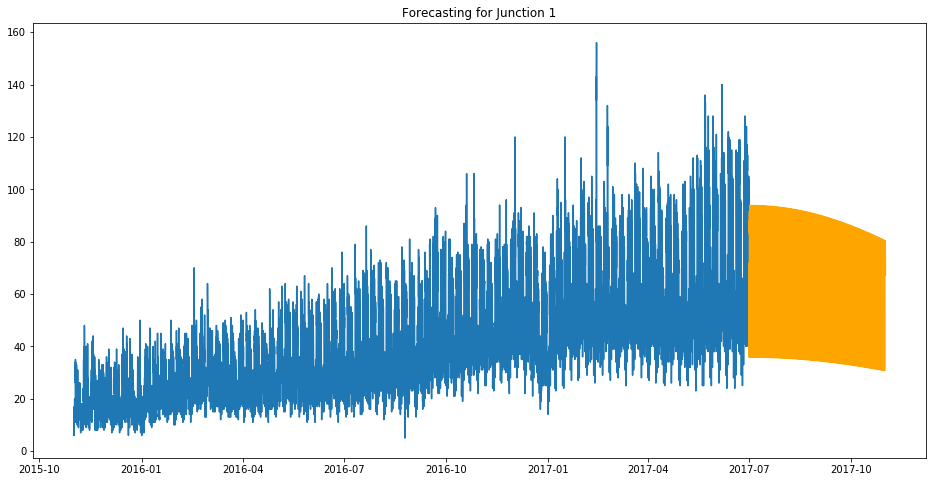

In [57]:
pred_j1=results_j1.forecast(test_junc1.index[-1])
#pred_j1=results_j1.get_prediction(index=test_junc1.index,start=1, end=len(test_junc1)).predicted_mean
pred_j1=np.exp(pred_j1)
plt.figure(figsize=(16,8))
plt.plot(train_junc1)
plt.plot(pred_j1,color='orange')
plt.title('Forecasting for Junction 1')
plt.show()

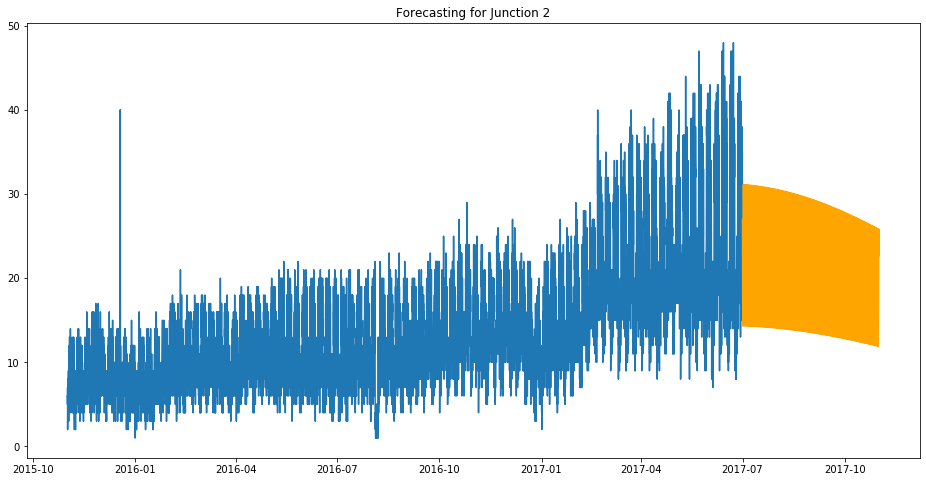

In [58]:
pred_j2=results_j2.forecast(test_junc2.index[-1])
#pred_j2=results_j2.get_prediction(index=test_junc2.index,start=1, end=len(test_junc2)).predicted_mean
pred_j2=np.exp(pred_j2)
plt.figure(figsize=(16,8))
plt.plot(train_junc2)
plt.plot(pred_j2,color='orange')
plt.title('Forecasting for Junction 2')
plt.show()

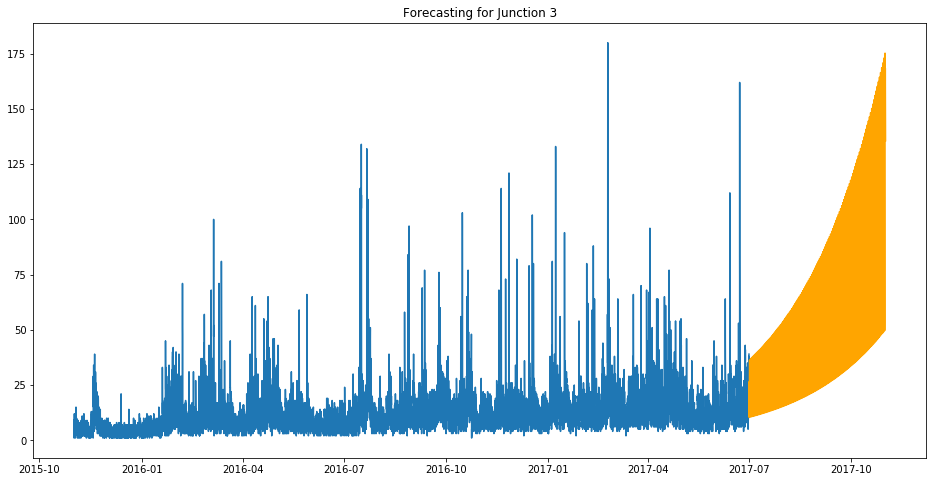

In [81]:
pred_j3=results_j3.forecast(test_junc3.index[-1])
#pred_j3=results_j3.get_prediction(index=test_junc3.index,start=1, end=len(test_junc3)).predicted_mean
pred_j3=np.exp(pred_j3)
plt.figure(figsize=(16,8))
plt.plot(train_junc3)
plt.plot(pred_j3,color='orange')
plt.title('Forecasting for Junction 3')
plt.show()

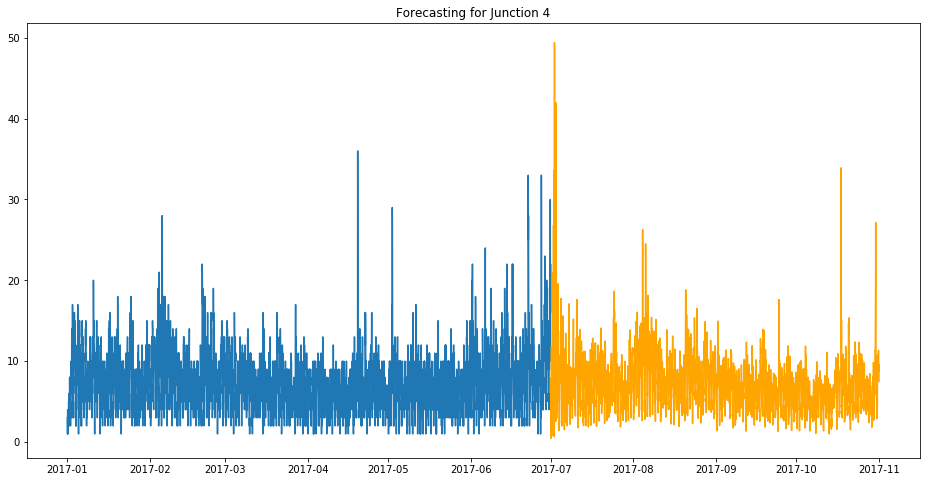

In [63]:
#pred_j4=results_j4.forecast(test_junc4.index[-1])
pred_j4=results_j4.get_prediction(index=test_junc4.index,start=1, end=len(test_junc4)).predicted_mean
pred_j4=np.exp(pred_j4)
plt.figure(figsize=(16,8))
plt.plot(train_junc4)
plt.plot(pred_j4,color='orange')
plt.title('Forecasting for Junction 4')
plt.show()

In [ ]:
#pred_j1= results_j1.get_prediction(index=test_junc1.index, start=1, end=len(test_junc1))
#
#pred_values_j1=pd.DataFrame((np.round(pred_j1.predicted_mean)), index = test_junc1.index)
#pred_value_j1_final= pd.DataFrame(np.concatenate((train_junc1.tail(23),
#                                                  pred_values_j1), axis=0)).rolling(24).mean().dropna()
#pred_j1=pd.DataFrame(np.add(pred_value_j1_final,pred_values_j1),index=test_junc1.index)
#pred_ci1 = pred_j1.conf_int()
#
#ax = train_junc1.plot(label='observed')
#pred_values_j1.plot(ax=ax, label='One-step ahead Forecast', alpha=.8, figsize=(16,8))
#ax.fill_between(pred_ci1.index,
#                pred_ci1.iloc[:, 0],
#                pred_ci1.iloc[:, 1], color='k', alpha=.2)
#ax.set_xlabel('Date')
#ax.set_ylabel('Vehicles count')
#plt.legend()
#plt.show()
#pred_values_j1

In [ ]:
#pred_j2= results_j2.get_prediction(index=test_junc2.index, start=1, end=len(test_junc2))
#
#pred_values_j2=pd.DataFrame(np.round(pred_j2.predicted_mean+14), index = test_junc2.index)
#                        
#pred_ci2 = pred_j2.conf_int()
#
#ax = train_junc2.plot(label='observed')
#pred_values_j2.plot(ax=ax, label='One-step ahead Forecast', alpha=.8, figsize=(16,8))
#ax.fill_between(pred_ci2.index,
#                pred_ci2.iloc[:, 0],
#                pred_ci2.iloc[:, 1], color='k', alpha=.2)
#ax.set_xlabel('Date')
#ax.set_ylabel('Vehicles count')
#plt.legend()
#plt.show()
#pred_values_j2

In [ ]:
#pred_j3= results_j3.get_prediction(index=test_junc3.index, start=1, end=len(test_junc3))
#
#pred_values_j3=pd.DataFrame(np.round(pred_j3.predicted_mean+14), index = test_junc3.index)
#                        
#pred_ci3 = pred_j3.conf_int()
#
#ax = train_junc3.plot(label='observed')
#pred_values_j3.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(16,8))
#ax.fill_between(pred_ci3.index,
#                pred_ci3.iloc[:, 0],
#                pred_ci3.iloc[:, 1], color='k', alpha=.2)
#ax.set_xlabel('Date')
#ax.set_ylabel('Vehicles count')
#plt.legend()
#plt.show()
#pred_values_j3

In [ ]:
#pred_j4= results_j4.get_prediction(index=test_junc4.index, start=1, end=len(test_junc4))
#
#pred_values_j4=pd.DataFrame(np.round(pred_j4.predicted_mean+7), index = test_junc4.index)
#                        
#pred_ci4 = pred_j4.conf_int()
#
#ax = train_junc4.plot(label='observed')
#pred_values_j4.plot(ax=ax, label='One-step ahead Forecast', alpha=.8, figsize=(16,8))
#ax.fill_between(pred_ci4.index,
#                pred_ci4.iloc[:, 0],
#                pred_ci4.iloc[:, 1], color='k', alpha=.2)
#ax.set_xlabel('Date')
#ax.set_ylabel('Vehicles count')
#plt.legend()
#plt.show()
#pred_values_j4

In [64]:
pred_ts=np.concatenate((pred_j1,pred_j2,pred_j3,pred_j4),axis=0)
pred_ts


array([71.75052573, 60.51762417, 50.97302417, ...,  9.59596697,
        8.34120245,  7.50607414])

In [65]:
sub['Vehicles'] = pred_ts
sub.to_csv('submission.csv', index=False)

In [82]:
import re
def gen_date_features(df, fldname, drop=True):
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Hour','Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre+"Is_weekend"]=df[targ_pre+"Dayofweek"].apply(lambda x:1 if x==5 or x==6 else 0)

    if drop: df.drop(fldname, axis=1, inplace=True)

In [83]:
for df in (train, test):
    gen_date_features(df, 'DateTime', drop=False)
    #df.reset_index(drop=True, inplace=True)

In [84]:
train.shape, test.shape

((48120, 18), (11808, 17))

In [85]:
train.describe()

Junction      Vehicles            ID  DateTimeYear  DateTimeMonth  \
count  48120.000000  48120.000000  4.812000e+04  48120.000000   48120.000000   
mean       2.180549     22.791334  2.016330e+10   2016.269825       5.884289   
std        0.966955     20.750063  5.944854e+06      0.616093       3.569872   
min        1.000000      1.000000  2.015110e+10   2015.000000       1.000000   
25%        1.000000      9.000000  2.016042e+10   2016.000000       3.000000   
50%        2.000000     15.000000  2.016093e+10   2016.000000       5.000000   
75%        3.000000     29.000000  2.017023e+10   2017.000000       9.000000   
max        4.000000    180.000000  2.017063e+10   2017.000000      12.000000   

       DateTimeWeek   DateTimeDay  DateTimeHour  DateTimeDayofweek  \
count  48120.000000  48120.000000  48120.000000       48120.000000   
mean      23.941646     15.700748     11.500000           2.996010   
std       15.718066      8.784073      6.922258           2.000017   
min        1.000000      1.000000      0.000000           0.000000   
25%       11.000000      8.000000      5.750000           1.000000   
50%       21.000000     16.000000     11.500000           3.000000   
75%       38.000000     23.000000     17.250000           5.000000   
max       53.000000     31.000000     23.000000           6.000000   

       DateTimeDayofyear  DateTimeIs_weekend  
count       48120.000000        48120.000000  
mean          163.926185            0.284289  
std           109.219475            0.451080  
min             1.000000            0.000000  
25%            72.000000            0.000000  
50%           144.000000            0.000000  
75%           260.000000            1.000000  
max           366.000000            1.000000

In [86]:
test.describe()

Junction            ID  DateTimeYear  DateTimeMonth  DateTimeWeek  \
count  11808.000000  1.180800e+04       11808.0   11808.000000  11808.000000   
mean       2.500000  2.017087e+10        2017.0       8.495935     35.000000   
std        1.118081  1.124665e+05           0.0       1.121704      5.084865   
min        1.000000  2.017070e+10        2017.0       7.000000     26.000000   
25%        1.750000  2.017073e+10        2017.0       7.000000     31.000000   
50%        2.500000  2.017083e+10        2017.0       8.000000     35.000000   
75%        3.250000  2.017100e+10        2017.0      10.000000     39.000000   
max        4.000000  2.017103e+10        2017.0      10.000000     44.000000   

        DateTimeDay  DateTimeHour  DateTimeDayofweek  DateTimeDayofyear  \
count  11808.000000   11808.00000       11808.000000       11808.000000   
mean      15.878049      11.50000           3.000000         243.000000   
std        8.877665       6.92248           2.020309          35.507372   
min        1.000000       0.00000           0.000000         182.000000   
25%        8.000000       5.75000           1.000000         212.000000   
50%       16.000000      11.50000           3.000000         243.000000   
75%       24.000000      17.25000           5.000000         274.000000   
max       31.000000      23.00000           6.000000         304.000000   

       DateTimeIs_weekend  
count        11808.000000  
mean             0.292683  
std              0.455013  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max              1.000000

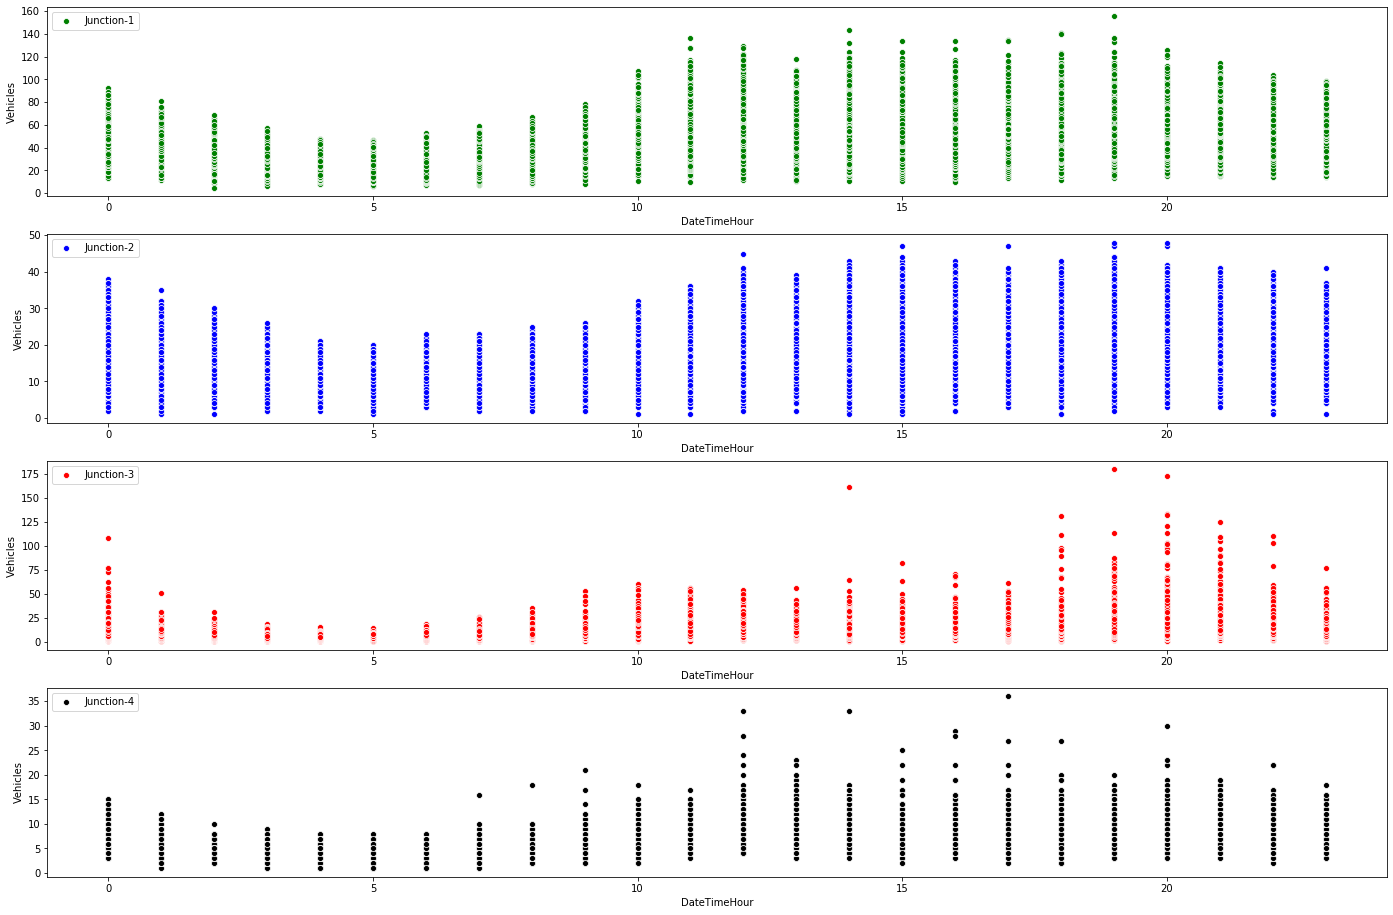

In [87]:
plt.figure(figsize=(24,16))
plt.subplot(411)
sns.scatterplot(train.DateTimeHour, train[train.Junction==1].Vehicles, color = 'green', label='Junction-1')
plt.legend(loc='upper left')
plt.subplot(412)
sns.scatterplot(train.DateTimeHour, train[train.Junction==2].Vehicles, color = 'blue', label='Junction-2')
plt.legend(loc='upper left')
plt.subplot(413)
sns.scatterplot(train.DateTimeHour, train[train.Junction==3].Vehicles, color = 'red', label='Junction-3')
plt.legend(loc='upper left')
plt.subplot(414)
sns.scatterplot(train.DateTimeHour, train[train.Junction==4].Vehicles, color = 'black', label='Junction-4')
plt.legend(loc='upper left')
plt.show()

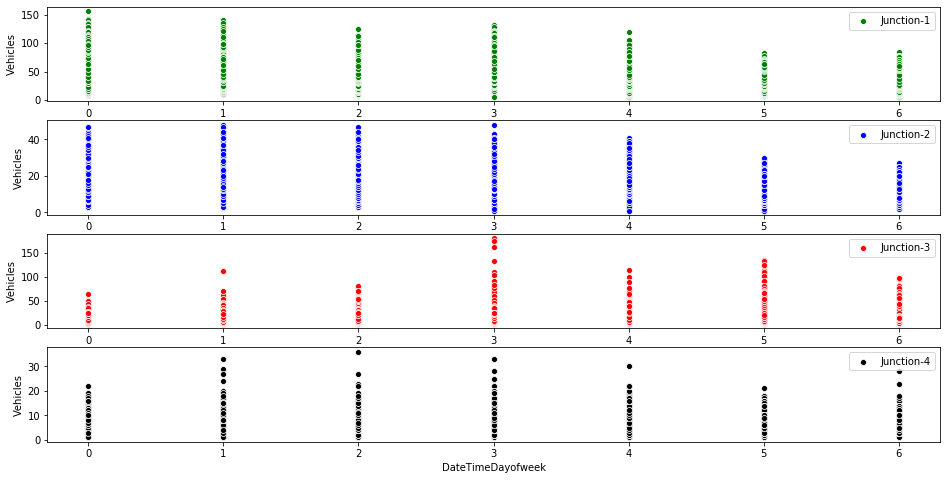

In [88]:
plt.figure(figsize=(16,8))
plt.subplot(411)
sns.scatterplot(train.DateTimeDayofweek, train[train.Junction==1].Vehicles, color = 'green', label='Junction-1')
plt.legend(loc='upper right')
plt.subplot(412)
sns.scatterplot(train.DateTimeDayofweek, train[train.Junction==2].Vehicles, color = 'blue', label='Junction-2')
plt.legend(loc='upper right')
plt.subplot(413)
sns.scatterplot(train.DateTimeDayofweek, train[train.Junction==3].Vehicles, color = 'red', label='Junction-3')
plt.legend(loc='upper right')
plt.subplot(414)
sns.scatterplot(train.DateTimeDayofweek, train[train.Junction==4].Vehicles, color = 'black', label='Junction-4')
plt.legend(loc='upper right')
plt.show()

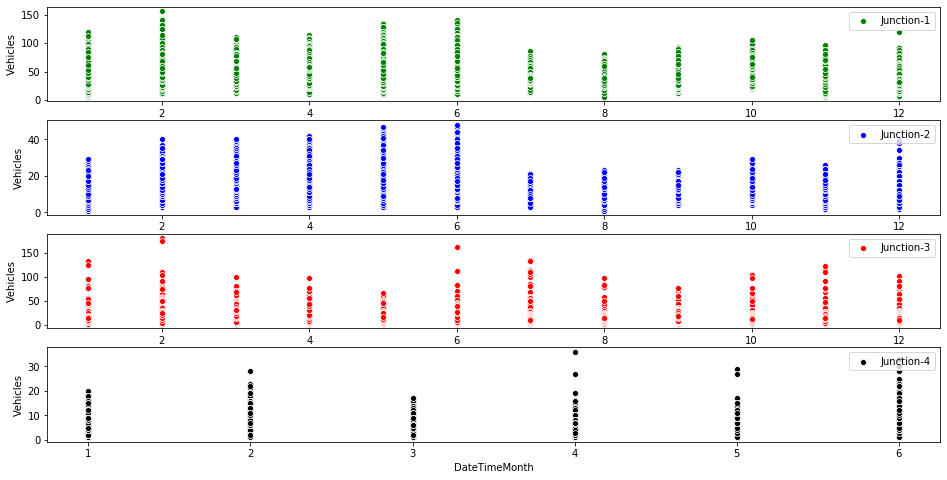

In [89]:
plt.figure(figsize=(16,8))
plt.subplot(411)
sns.scatterplot(train.DateTimeMonth, train[train.Junction==1].Vehicles, color = 'green', label='Junction-1')
plt.legend(loc='upper right')
plt.subplot(412)
sns.scatterplot(train.DateTimeMonth, train[train.Junction==2].Vehicles, color = 'blue', label='Junction-2')
plt.legend(loc='upper right')
plt.subplot(413)
sns.scatterplot(train.DateTimeMonth, train[train.Junction==3].Vehicles, color = 'red', label='Junction-3')
plt.legend(loc='upper right')
plt.subplot(414)
sns.scatterplot(train.DateTimeMonth, train[train.Junction==4].Vehicles, color = 'black', label='Junction-4')
plt.legend(loc='upper right')
plt.show()

In [90]:
train.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID', 'DateTimeYear',
       'DateTimeMonth', 'DateTimeWeek', 'DateTimeDay', 'DateTimeHour',
       'DateTimeDayofweek', 'DateTimeDayofyear', 'DateTimeIs_month_end',
       'DateTimeIs_month_start', 'DateTimeIs_quarter_end',
       'DateTimeIs_quarter_start', 'DateTimeIs_year_end',
       'DateTimeIs_year_start', 'DateTimeIs_weekend'],
      dtype='object')

In [91]:
cols_to_remove=['DateTime','ID']
train.drop(cols_to_remove, axis=1, inplace=True)
test.drop(cols_to_remove, axis=1, inplace=True)
train.shape, test.shape

((48120, 16), (11808, 15))

In [92]:
train.corr().style.background_gradient(cmap='Oranges')

In [93]:
print('Checking high correlation between all feature in train dataset:')
feature_names=[i for i in train.columns if train[i].dtypes != 'object']
X = train[feature_names]
corr_matrix = X.corr().abs()
high_corr_var=np.where(corr_matrix>0.7)
corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print('Variable with high correlation are :',corr_var)

Checking high correlation between all feature in train dataset:
Variable with high correlation are : [('DateTimeMonth', 'DateTimeWeek'), ('DateTimeMonth', 'DateTimeDayofyear'), ('DateTimeWeek', 'DateTimeDayofyear'), ('DateTimeDayofweek', 'DateTimeIs_weekend')]


In [94]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [95]:
train_uncorr=correlation(train, 0.7)
##test_uncorr=correlation(test, 0.7)
train_uncorr.columns

Index(['Junction', 'Vehicles', 'DateTimeYear', 'DateTimeMonth', 'DateTimeDay',
       'DateTimeHour', 'DateTimeDayofweek', 'DateTimeIs_month_end',
       'DateTimeIs_month_start', 'DateTimeIs_quarter_end',
       'DateTimeIs_quarter_start', 'DateTimeIs_year_end',
       'DateTimeIs_year_start'],
      dtype='object')

In [96]:
feature_names=[i for i in train_uncorr.columns if i!= 'Vehicles']
X_trn = train[feature_names]
y_trn = train['Vehicles']
X_tst = test[feature_names]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_trn, y_trn,stratify=train.Junction,
                                                      test_size=0.3,random_state=8)

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_tst.shape

((33684, 12), (33684,), (14436, 12), (14436,), (11808, 12))

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators=500,random_state=42,max_features = "auto",max_depth=20,bootstrap=False,
                            min_samples_leaf=8,min_samples_split=5,n_jobs = -1)
rf.fit(X_train, y_train)

print('RMSE of Random Forest regressor on training set: {:.2f}'
     .format(RMSE(y_train, rf.predict(X_train))))
print('RMSE of Random Forest regressor on Validation set: {:.2f}'
     .format(RMSE(y_valid, rf.predict(X_valid))))

RMSE of Random Forest regressor on training set: 4.06
RMSE of Random Forest regressor on Validation set: 4.82


In [99]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
imp_feature=feature_importances[feature_importances['importance']>=0.01].T.columns
print(len(imp_feature))
feature_importances

6


importance
Junction                    0.534486
DateTimeYear                0.171105
DateTimeHour                0.134862
DateTimeDayofweek           0.072523
DateTimeMonth               0.066552
DateTimeDay                 0.020015
DateTimeIs_month_start      0.000209
DateTimeIs_month_end        0.000103
DateTimeIs_year_start       0.000070
DateTimeIs_quarter_start    0.000069
DateTimeIs_quarter_end      0.000004
DateTimeIs_year_end         0.000001

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators=500,random_state=42,max_features = "auto",max_depth=None,bootstrap=False,
                            min_samples_leaf=8,min_samples_split=5,n_jobs = -1)
rf.fit(X_train[imp_feature], y_train)

print('RMSE of Random Forest regressor on training set: {:.2f}'
     .format(RMSE(y_train, rf.predict(X_train[imp_feature]))))
print('RMSE of Random Forest regressor on Validation set: {:.2f}'
     .format(RMSE(y_valid, rf.predict(X_valid[imp_feature]))))

RMSE of Random Forest regressor on training set: 4.06
RMSE of Random Forest regressor on Validation set: 4.82


In [101]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7, metric='minkowski', p=1, weights='uniform',leaf_size=3, n_jobs=-1)
#knn = KNeighborsRegressor(algorithm='auto', leaf_size=10, metric='minkowski',
#                          metric_params=None, n_jobs=-1, n_neighbors=3, p=2, weights='distance')
#knn = KNeighborsRegressor(leaf_size=9,n_jobs=-1,n_neighbors=9,algorithm='auto')
knn.fit(X_train, y_train)
print('RMSE of KNN regressor on training set: {:.2f}'
     .format(RMSE(y_train, knn.predict(X_train))))
print('RMSE of KNN regressor on Validation set: {:.2f}'
     .format(RMSE(y_valid, knn.predict(X_valid))))

RMSE of KNN regressor on training set: 10.35
RMSE of KNN regressor on Validation set: 11.70


In [102]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7, metric='minkowski', p=1, weights='uniform',leaf_size=3, n_jobs=-1)
#knn = KNeighborsRegressor(algorithm='auto', leaf_size=10, metric='minkowski',
#                          metric_params=None, n_jobs=-1, n_neighbors=3, p=2, weights='distance')
#knn = KNeighborsRegressor(leaf_size=9,n_jobs=-1,n_neighbors=9,algorithm='auto')
knn.fit(X_train[imp_feature], y_train)
print('RMSE of KNN regressor on training set: {:.2f}'
     .format(RMSE(y_train, knn.predict(X_train[imp_feature]))))
print('RMSE of KNN regressor on Validation set: {:.2f}'
     .format(RMSE(y_valid, knn.predict(X_valid[imp_feature]))))

RMSE of KNN regressor on training set: 10.21
RMSE of KNN regressor on Validation set: 11.55


In [103]:
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
XGBModel = XGBRegressor(booster='gbtree', n_estimators=500,max_depth=4,min_child_weight=6,subsample=0.5,
                        gamma=0.1, eval_metric='rmse', seed=123)
XGBModel.fit(X_train[imp_feature], y_train , verbose=False)

print('RMSE of XGB regressor on training set: {:.2f}'
     .format(RMSE(y_train, XGBModel.predict(X_train[imp_feature]))))
print('RMSE of XGB regressor on Validation set: {:.2f}'
     .format(RMSE(y_valid, XGBModel.predict(X_valid[imp_feature]))))

[23:04:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE of XGB regressor on training set: 4.95
RMSE of XGB regressor on Validation set: 4.77


In [104]:
pred=rf.predict(X_tst[imp_feature])
sub['Vehicles'] = pred
sub.to_csv('submission.csv', index=False)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,5,8, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6, 8,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
rf = RandomForestRegressor(random_state=42,n_jobs = -1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train[imp_feature], y_train)

In [ ]:
rf_random.best_params_

In [105]:
from sklearn.ensemble import RandomForestRegressor
rfi=RandomForestRegressor(n_estimators=200,random_state=42,max_features = "sqrt",max_depth=35,bootstrap=False,
                            min_samples_leaf=6,min_samples_split=10,n_jobs = -1)
rfi.fit(X_train[imp_feature], y_train)

print('RMSE of Random Forest regressor on training set: {:.2f}'
     .format(RMSE(y_train, rfi.predict(X_train[imp_feature]))))
print('RMSE of Random Forest regressor on Validation set: {:.2f}'
     .format(RMSE(y_valid, rfi.predict(X_valid[imp_feature]))))

RMSE of Random Forest regressor on training set: 3.65
RMSE of Random Forest regressor on Validation set: 4.25


In [106]:
pred=rfi.predict(X_tst[imp_feature])
sub['Vehicles'] = pred
sub.to_csv('submission.csv', index=False)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 10)]
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
min_child_weight=[int(x) for x in np.linspace(0, 10, num = 11)]
subsample=[x.round(2) for x in np.linspace(.1, 1, num = 10)]
colsample_bytree=[x.round(2) for x in np.linspace(.1, 1, num = 10)]
gamma = [x.round(3) for x in np.linspace(.01, .3, num = 10)]
eta=[x.round(3) for x in np.linspace(.01, .2, num = 10)]
seed=[8,41,123]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_child_weight':min_child_weight,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'gamma': gamma,
               'eta': eta,
               'seed':seed}
print(random_grid)

In [ ]:
xgb = XGBRegressor(eval_metric='rmse',booster='gbtree',objective='reg:linear')
# Random search of parameters, using 3 fold cross validation, 
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 10, cv = 3, random_state=42, n_jobs = -1)
# Fit the random search model
xgb_random.fit(X_train[imp_feature], y_train)

In [ ]:
xgb_random.best_params_

In [130]:
XGBModel_tuned = XGBRegressor(booster='gbtree', n_estimators=100,max_depth=20,min_child_weight=10,subsample=0.9,
                              colsample_bytree=1, eta=0.001,
                        gamma=0.001, eval_metric='rmse', seed=123, objective='reg:linear')
XGBModel_tuned.fit(X_train[imp_feature], y_train , verbose=False)
print('RMSE of XGB regressor on training set: {:.2f}'
     .format(RMSE(y_train, XGBModel_tuned.predict(X_train[imp_feature]))))
print('RMSE of XGB regressor on Validation set: {:.2f}'
     .format(RMSE(y_valid, XGBModel_tuned.predict(X_valid[imp_feature]))))

[23:25:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE of XGB regressor on training set: 1.80
RMSE of XGB regressor on Validation set: 3.64


In [131]:
pred=XGBModel_tuned.predict(X_tst[imp_feature])
sub['Vehicles'] = pred
sub.to_csv('submission.csv', index=False)

In [109]:
from sklearn.ensemble import VotingRegressor
model = VotingRegressor(estimators=[('rf', rfi), ('xgb', XGBModel_tuned)],weights=[.2,.8])

model.fit(X_train[imp_feature], y_train)
print('RMSE of voting on training set: {:.2f}'
     .format(RMSE(y_train, model.predict(X_train[imp_feature]))))
print('RMSE of voting on Validation set: {:.2f}'
     .format(RMSE(y_valid, model.predict(X_valid[imp_feature]))))

[23:08:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE of voting on training set: 2.06
RMSE of voting on Validation set: 3.62


In [110]:
pred=model.predict(X_tst[imp_feature])
sub['Vehicles'] = pred
sub.to_csv('submission.csv', index=False)